In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

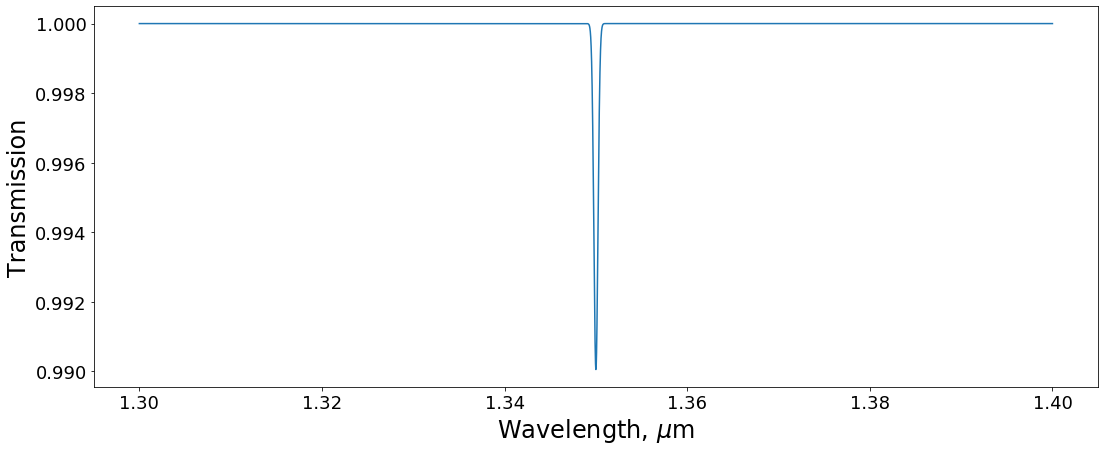

In [4]:
plt.figure(figsize=(18,7))
#%matplotlib notebook 
x = np.linspace(1.3, 1.4, 100000)
k = np.exp(-((x-1.35))**2/0.0000001)/100
G = np.exp(-k)
plt.plot(x, G)
plt.xlabel('Wavelength, $\mu$m', fontsize=24)
plt.ylabel('Transmission', fontsize=24)
ax=plt.gca()
ax.tick_params(labelsize=18)

(1.33, 1.37)

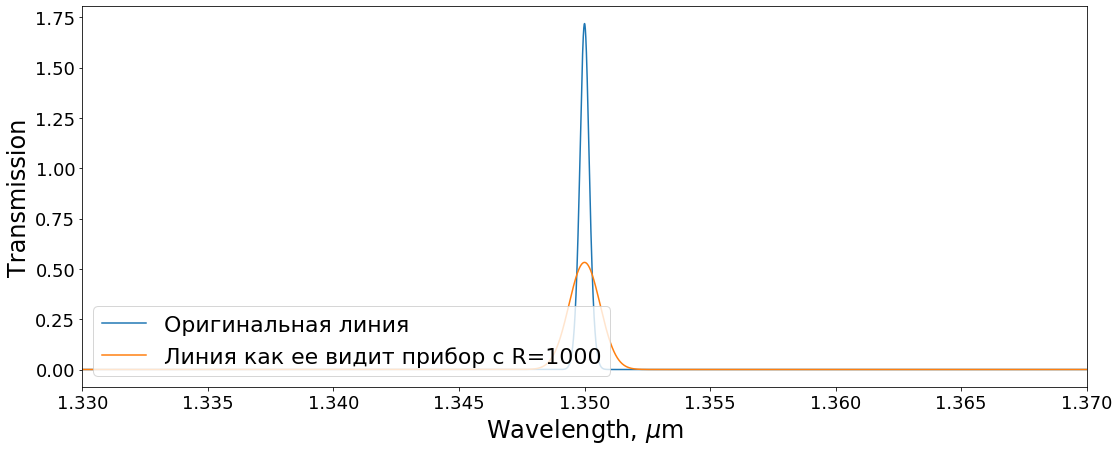

In [151]:
plt.figure(figsize=(18,7))

def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
def make_psf(x_psf, mu, R):
    return gaussian(x_psf, mu, mu/(R * 2*np.sqrt(2*np.log(2))))

R = 1000
x_psf = x[50000-5000:50000+5000]
psf = gaussian(x_psf, 1.35, 1.380/(R * 2*np.sqrt(2*np.log(2))))

#plt.plot(x, G)
z = np.convolve(G, psf/np.sum(psf), mode='valid')
x_new = np.convolve(x, psf/np.sum(psf), mode='valid')
plt.plot(x, G)
plt.plot(x_new, z)
#plt.plot(x_psf, psf)
plt.xlabel('Wavelength, $\mu$m', fontsize=24)
plt.ylabel('Transmission', fontsize=24)
ax=plt.gca()
ax.tick_params(labelsize=18)
plt.legend(['Оригинальная линия', 'Линия как ее видит прибор с R=1000'], fontsize=22, loc='lower left')
plt.xlim([1.33, 1.37])

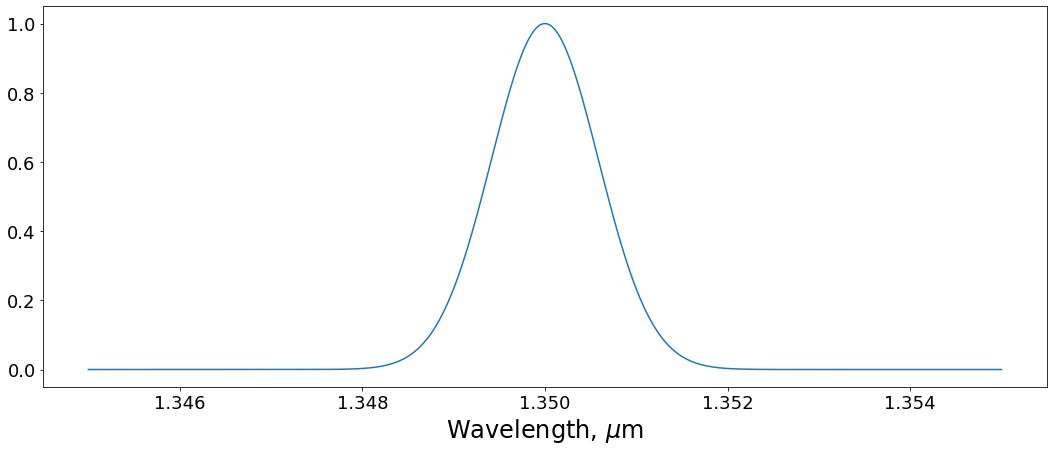

In [20]:
plt.figure(figsize=(18,7))

def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
def make_psf(x_psf, mu, R):
    return gaussian(x_psf, mu, mu/(R * 2*np.sqrt(2*np.log(2))))

R = 1000
x_psf = x[50000-5000:50000+5000]
psf = gaussian(x_psf, 1.35, 1.380/(R * 2*np.sqrt(2*np.log(2))))

#plt.plot(x, G)
#z = np.convolve(G, psf/np.sum(psf), mode='valid')
#x_new = np.convolve(x, psf/np.sum(psf), mode='valid')
#plt.plot(x, G)
plt.plot(x_psf, psf)
#plt.plot(x_psf, psf)
plt.xlabel('Wavelength, $\mu$m', fontsize=24)
#plt.ylabel('Transmission', fontsize=24)
ax=plt.gca()
ax.tick_params(labelsize=18)
#plt.legend(['Оригинальная линия', 'Линия как ее видит прибор с R=1000'], fontsize=22, loc='lower left')
#plt.xlim([1.33, 1.37])

[-0.00659105] [8.86846003e-09] [55.3787497]
[0.0007544] [9.50021395e-09] [37.91509673]
[0.0064653] [1.13898959e-08] [48.6699301]
[0.00439202] [1.02249873e-08] [40.2411041]
[0.00905576] [1.23929678e-08] [47.82177511]
[-0.00177148] [9.43898336e-09] [54.62261708]
[0.00047194] [9.52434718e-09] [51.59551115]
[-0.00481018] [9.5338469e-09] [54.59440654]
[0.00428184] [9.90901596e-09] [40.89319531]
[0.00289954] [9.07393483e-09] [53.96685874]


(1.33, 1.39)

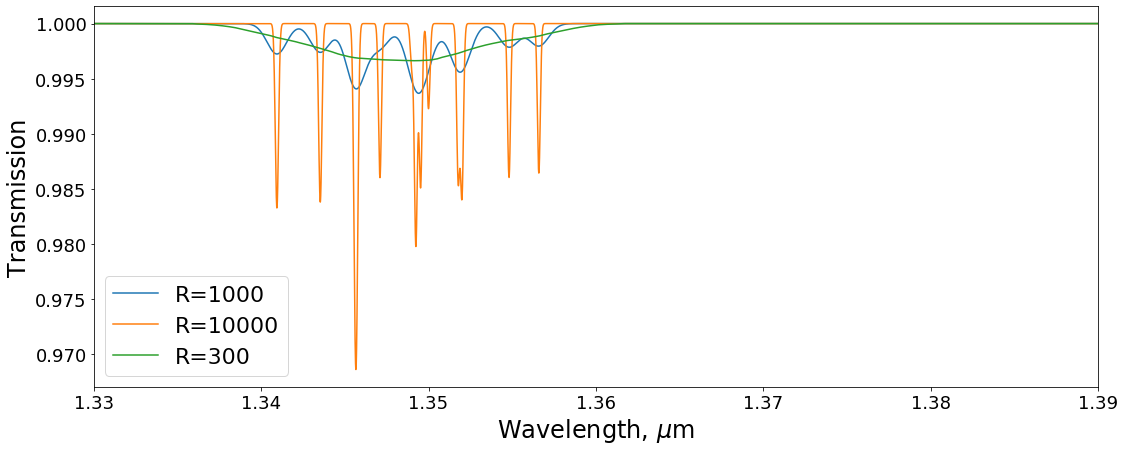

In [33]:
plt.figure(figsize=(18,7))


x = np.linspace(1.3, 1.4, 100000)
k = np.exp(-((x-1.35))**2/0.00000001)/100
k += np.exp(-((x-1.352))**2/0.00000001)/50
k += np.exp(-((x-1.349))**2/0.00000001)/200
for i in range(0,10):
    dx = np.random.randn(1)*0.005
    sigma = 0.00000001+np.random.randn(1)*0.000000001
    inten = np.random.randn(1)*10+50
    k += np.exp(-((x-1.35 + dx))**2/sigma)/inten
    print(dx, sigma, inten)

G = np.exp(-k)
R = 1000
x_psf = x[50000-5000:50000+5000]
psf = gaussian(x_psf, 1.35, 1.380/(R * 2*np.sqrt(2*np.log(2))))
psf1 = make_psf(x_psf, 1.35, 10000)
psf2 = make_psf(x_psf, 1.35, 300)


#plt.plot(x, G)
z = np.convolve(G, psf/np.sum(psf), mode='valid')
z1 = np.convolve(G, psf1/np.sum(psf1), mode='valid')
z2 = np.convolve(G, psf2/np.sum(psf2), mode='valid')
x_new = np.convolve(x, psf/np.sum(psf), mode='valid')
#plt.plot(x, G)
plt.plot(x_new, z)
plt.plot(x_new, z1)
plt.plot(x_new, z2)
#plt.plot(x_psf, psf)
plt.xlabel('Wavelength, $\mu$m', fontsize=24)
plt.ylabel('Transmission', fontsize=24)
ax=plt.gca()
ax.tick_params(labelsize=18)
plt.legend(['R=1000', 'R=10000', 'R=300'], fontsize=22, loc='lower left')
plt.xlim([1.33,1.39])

(1.335, 1.365)

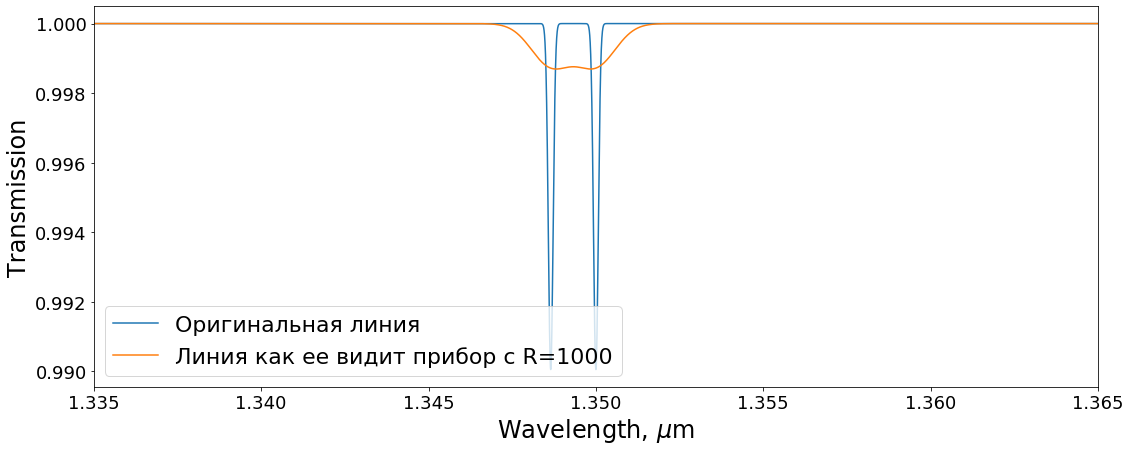

In [4]:
plt.figure(figsize=(18,7))

def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
x = np.linspace(1.3, 1.4, 100000)
k = np.exp(-((x-1.35))**2/0.00000001)/100
k += np.exp(-((x-1.35+0.00135))**2/0.00000001)/100
G = np.exp(-k)
R = 1000
x_psf = x[50000-5000:50000+5000]
psf = gaussian(x_psf, 1.35, 1.380/(R * 2*np.sqrt(2*np.log(2))))

#plt.plot(x, G)
z = np.convolve(G, psf/np.sum(psf), mode='valid')
x_new = np.convolve(x, psf/np.sum(psf), mode='valid')
plt.plot(x, G)
plt.plot(x_new, z)
#plt.plot(x_psf, psf)
plt.xlabel('Wavelength, $\mu$m', fontsize=24)
plt.ylabel('Transmission', fontsize=24)
ax=plt.gca()
ax.tick_params(labelsize=18)
plt.legend(['Оригинальная линия', 'Линия как ее видит прибор с R=1000'], fontsize=22, loc='lower left')
plt.xlim([1.335,1.365])

(1.335, 1.365)

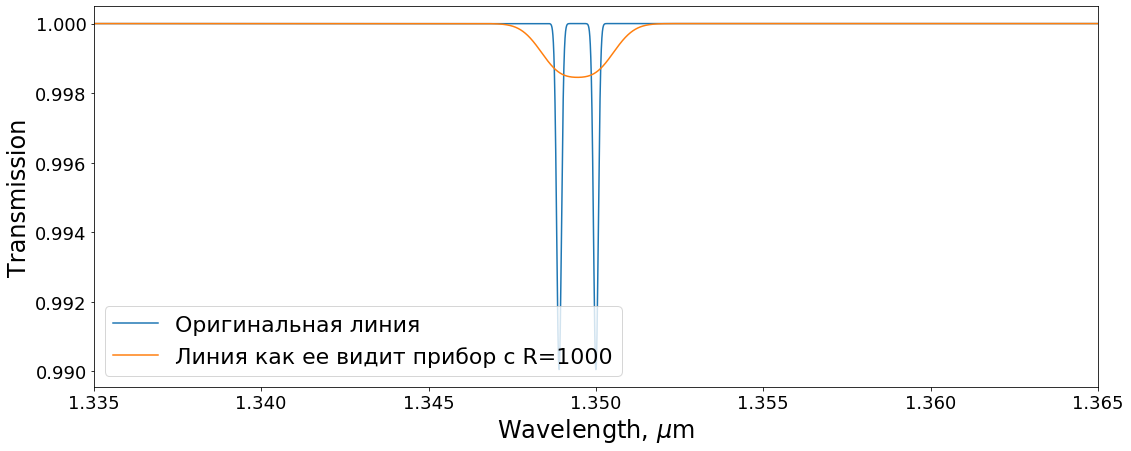

In [6]:
plt.figure(figsize=(18,7))

def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
x = np.linspace(1.3, 1.4, 100000)
k = np.exp(-((x-1.35))**2/0.00000001)/100
k += np.exp(-((x-1.35+0.0011))**2/0.00000001)/100
G = np.exp(-k)
R = 1000
x_psf = x[50000-5000:50000+5000]
psf = gaussian(x_psf, 1.35, 1.380/(R * 2*np.sqrt(2*np.log(2))))

#plt.plot(x, G)
z = np.convolve(G, psf/np.sum(psf), mode='valid')
x_new = np.convolve(x, psf/np.sum(psf), mode='valid')
plt.plot(x, G)
plt.plot(x_new, z)
#plt.plot(x_psf, psf)
plt.xlabel('Wavelength, $\mu$m', fontsize=24)
plt.ylabel('Transmission', fontsize=24)
ax=plt.gca()
ax.tick_params(labelsize=18)
plt.legend(['Оригинальная линия', 'Линия как ее видит прибор с R=1000'], fontsize=22, loc='lower left')
plt.xlim([1.335,1.365])

In [30]:
mars = np.loadtxt('data/mars.txt', skiprows=6)

In [11]:
mars[:,1]

array([0.60718, 0.60712, 0.60705, ..., 0.77344, 0.77718, 0.78354])

Text(0, 0.5, 'Transmission')

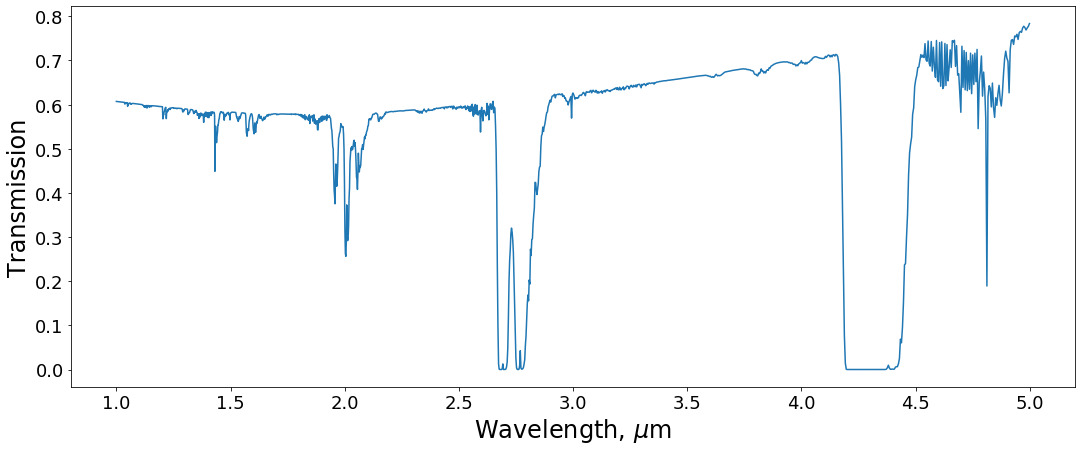

In [20]:
plt.figure(figsize=(18,7))
plt.plot(mars[:,0], mars[:,1])
#plt.plot(mars[:,0], mars[:,8])
#plt.plot(mars[:,0], mars[:,8]*mars[:,2])
plt.xlabel('Wavelength, $\mu$m', fontsize=24)
ax=plt.gca()
ax.tick_params(labelsize=18)
plt.ylabel('Transmission', fontsize=24)
#plt.legend(['Оригинальная линия', 'Линия как ее видит прибор с R=1000'], fontsize=22, loc='lower left')
#plt.xlim([1.335,1.365])
#plt.legend(['Спектр пропускания Марса'], fontsize=22, loc='lower left')

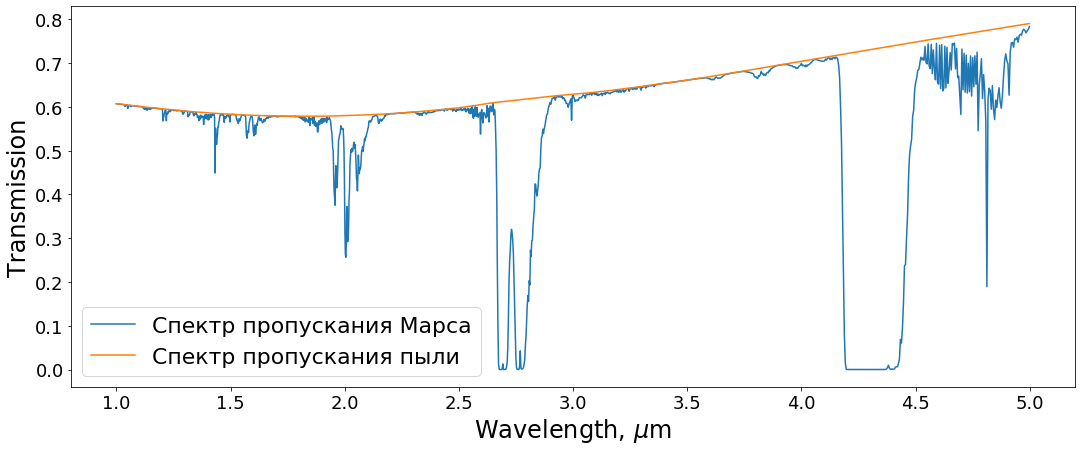

In [37]:
plt.figure(figsize=(18,7))
plt.plot(mars[:,0], mars[:,1])
plt.plot(mars[:,0], mars[:,8])
#plt.plot(mars[:,0], mars[:,8]*mars[:,2])
plt.xlabel('Wavelength, $\mu$m', fontsize=24)
ax=plt.gca()
ax.tick_params(labelsize=18)
plt.ylabel('Transmission', fontsize=24)
plt.legend(['Спектр пропускания Марса', 'Спектр пропускания пыли'], fontsize=22, loc='lower left')
#plt.xlim([1.335,1.365])

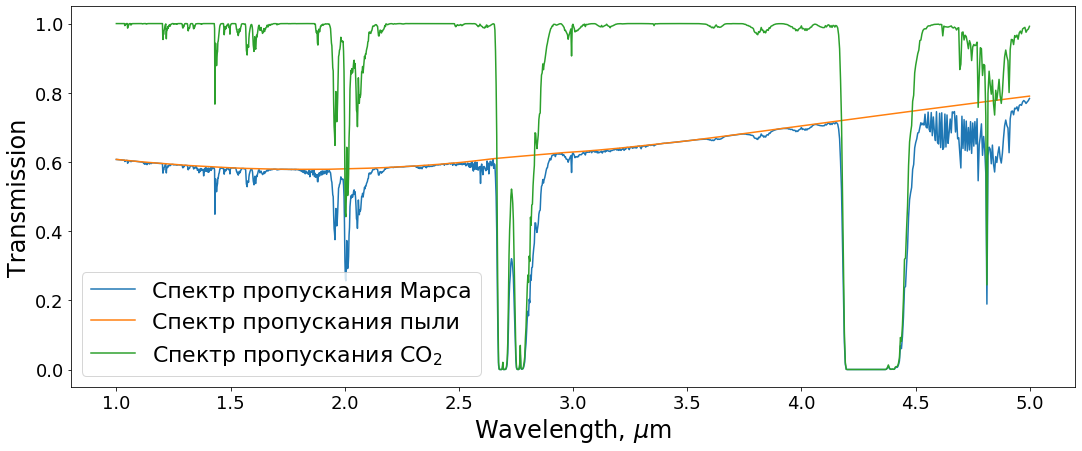

In [38]:
plt.figure(figsize=(18,7))
plt.plot(mars[:,0], mars[:,1])
plt.plot(mars[:,0], mars[:,8])
plt.plot(mars[:,0], mars[:,2])
plt.xlabel('Wavelength, $\mu$m', fontsize=24)
ax=plt.gca()
ax.tick_params(labelsize=18)
plt.ylabel('Transmission', fontsize=24)
plt.legend(['Спектр пропускания Марса', 'Спектр пропускания пыли', 'Спектр пропускания CO$_2$'], fontsize=22, loc='lower left')
#plt.xlim([1.335,1.365])

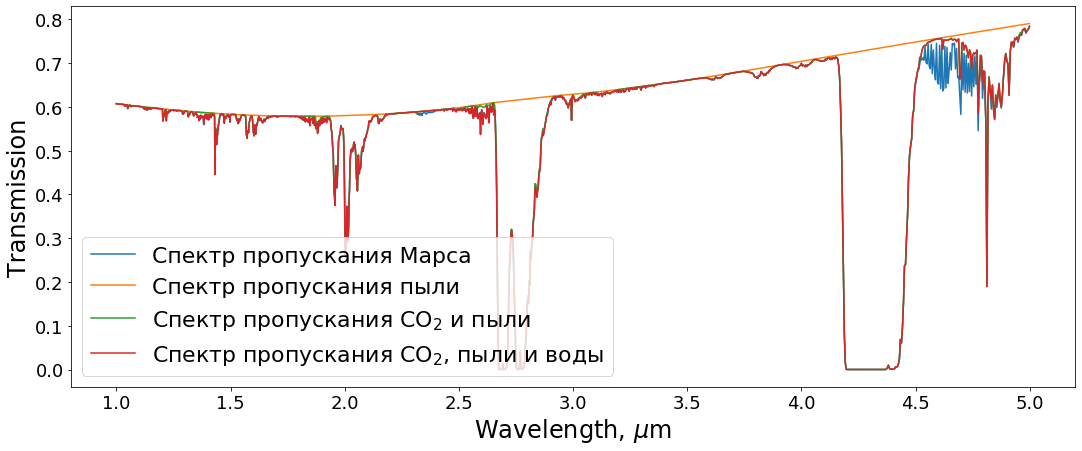

In [41]:
plt.figure(figsize=(18,7))
plt.plot(mars[:,0], mars[:,1])
plt.plot(mars[:,0], mars[:,8])
plt.plot(mars[:,0], mars[:,8]*mars[:,2])
plt.plot(mars[:,0], mars[:,8]*mars[:,2]*mars[:,6])
plt.xlabel('Wavelength, $\mu$m', fontsize=24)
ax=plt.gca()
ax.tick_params(labelsize=18)
plt.ylabel('Transmission', fontsize=24)
plt.legend(['Спектр пропускания Марса', 'Спектр пропускания пыли', 'Спектр пропускания CO$_2$ и пыли', 'Спектр пропускания CO$_2$, пыли и воды'], fontsize=22, loc='lower left')
#plt.xlim([1.335,1.365])

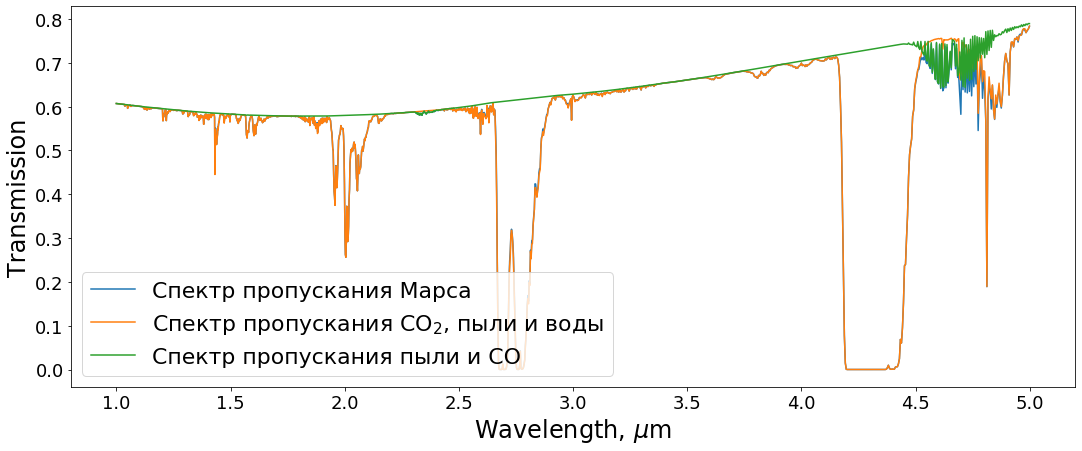

In [42]:
plt.figure(figsize=(18,7))
plt.plot(mars[:,0], mars[:,1])
#plt.plot(mars[:,0], mars[:,8])
#plt.plot(mars[:,0], mars[:,8]*mars[:,2])
#plt.plot(mars[:,0], mars[:,8]*mars[:,2]*mars[:,6])
plt.plot(mars[:,0], mars[:,8]*mars[:,2]*mars[:,6])
plt.plot(mars[:,0], mars[:,8]*mars[:,5])
plt.xlabel('Wavelength, $\mu$m', fontsize=24)
ax=plt.gca()
ax.tick_params(labelsize=18)
plt.ylabel('Transmission', fontsize=24)
plt.legend(['Спектр пропускания Марса', 'Спектр пропускания CO$_2$, пыли и воды',  'Спектр пропускания пыли и CO'], fontsize=22, loc='lower left')
#plt.xlim([1.335,1.365])

In [33]:
venus = np.loadtxt('data/venus.txt', skiprows=2)

Text(0, 0.5, 'Transmission')

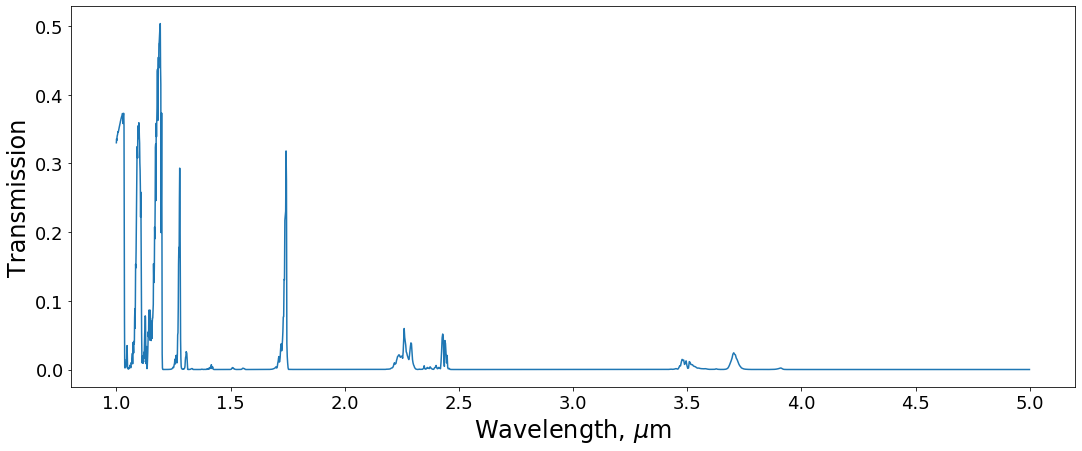

In [36]:
plt.figure(figsize=(18,7))
plt.plot(venus[:,0], venus[:,1])
#plt.plot(venus[:,0], venus[:,2])

plt.xlabel('Wavelength, $\mu$m', fontsize=24)
ax=plt.gca()
ax.tick_params(labelsize=18)
plt.ylabel('Transmission', fontsize=24)
#plt.legend(['Спектр пропускания Марса', 'Спектр поглощения CO$_2$, пыли и воды',  'Спектр поглощения пыли и CO'], fontsize=22, loc='lower left')
#plt.xlim([1.335,1.365])

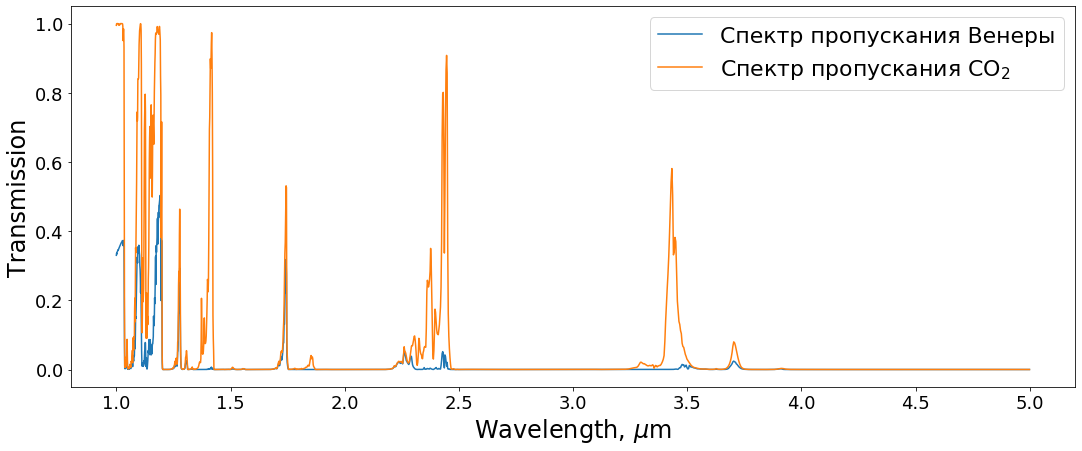

In [44]:
plt.figure(figsize=(18,7))
plt.plot(venus[:,0], venus[:,1])
plt.plot(venus[:,0], venus[:,2])

plt.xlabel('Wavelength, $\mu$m', fontsize=24)
ax=plt.gca()
ax.tick_params(labelsize=18)
plt.ylabel('Transmission', fontsize=24)
plt.legend(['Спектр пропускания Венеры', 'Спектр пропускания CO$_2$'], fontsize=22)
#plt.xlim([1.335,1.365])

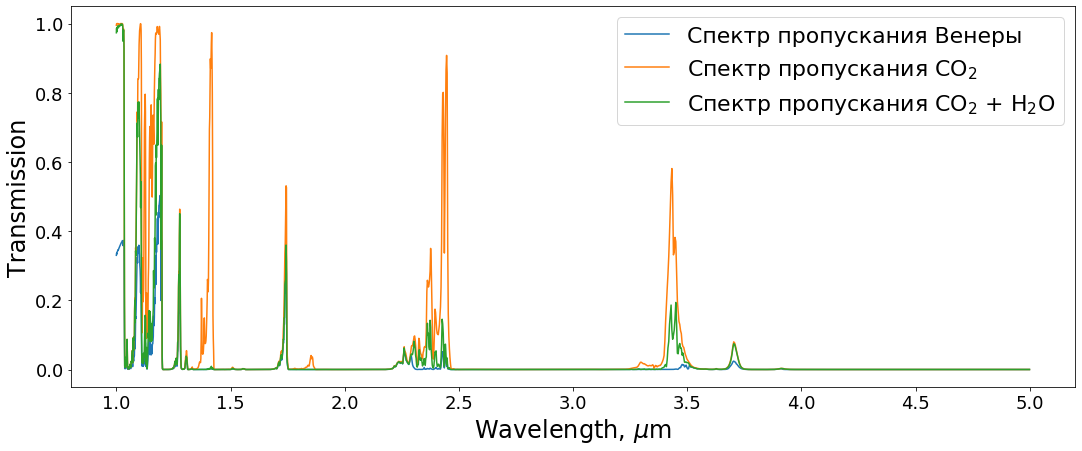

In [47]:
plt.figure(figsize=(18,7))
plt.plot(venus[:,0], venus[:,1])
plt.plot(venus[:,0], venus[:,2])
plt.plot(venus[:,0], venus[:,2]*venus[:,7])

plt.xlabel('Wavelength, $\mu$m', fontsize=24)
ax=plt.gca()
ax.tick_params(labelsize=18)
plt.ylabel('Transmission', fontsize=24)
plt.legend(['Спектр пропускания Венеры', 'Спектр пропускания CO$_2$', 'Спектр пропускания CO$_2$ + H$_2$O'], fontsize=22)
#plt.xlim([1.335,1.365])

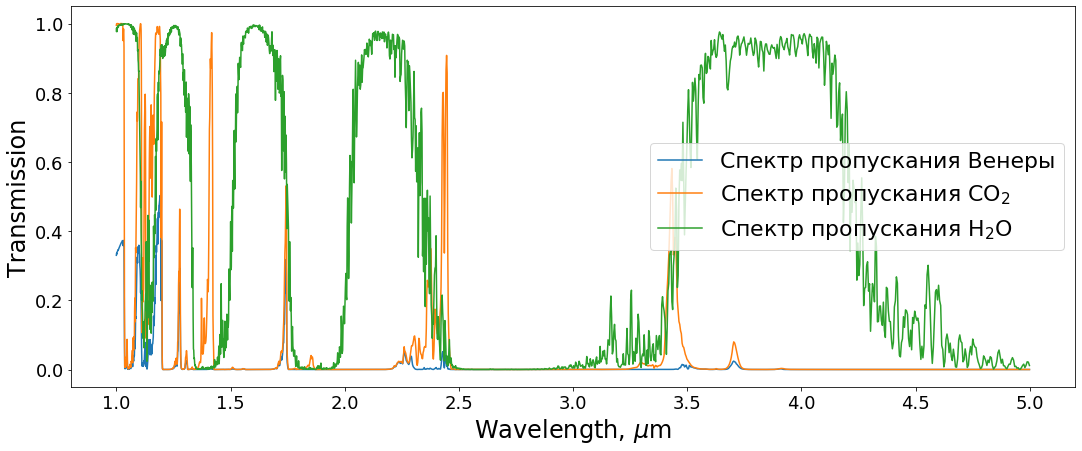

In [49]:
plt.figure(figsize=(18,7))
plt.plot(venus[:,0], venus[:,1])
plt.plot(venus[:,0], venus[:,2])
plt.plot(venus[:,0], venus[:,7])

plt.xlabel('Wavelength, $\mu$m', fontsize=24)
ax=plt.gca()
ax.tick_params(labelsize=18)
plt.ylabel('Transmission', fontsize=24)
plt.legend(['Спектр пропускания Венеры', 'Спектр пропускания CO$_2$', 'Спектр пропускания H$_2$O'], fontsize=22)
#plt.xlim([1.335,1.365])

(1, 2)

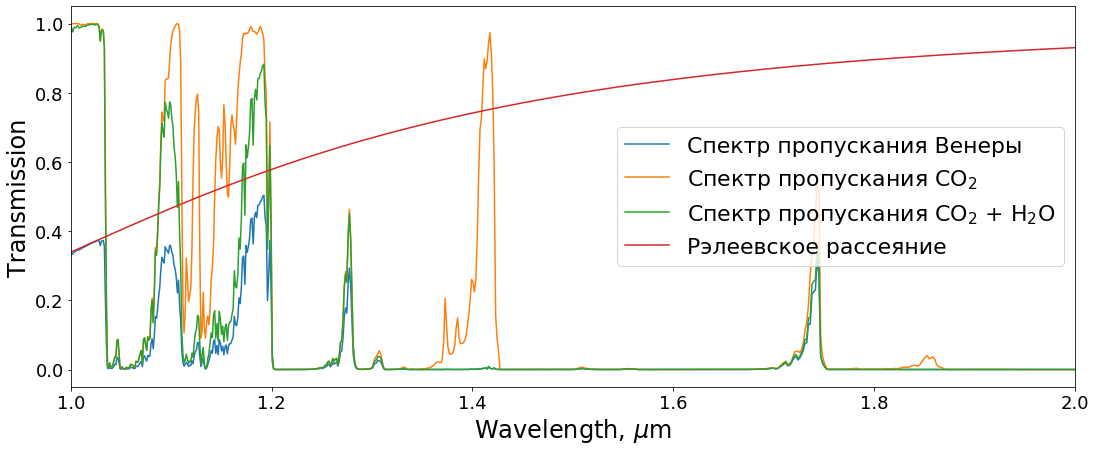

In [51]:
plt.figure(figsize=(18,7))
plt.plot(venus[:,0], venus[:,1])
plt.plot(venus[:,0], venus[:,2])
plt.plot(venus[:,0], venus[:,2]*venus[:,7])
plt.plot(venus[:,0], venus[:,-2])
plt.xlabel('Wavelength, $\mu$m', fontsize=24)
ax=plt.gca()
ax.tick_params(labelsize=18)
plt.ylabel('Transmission', fontsize=24)
plt.legend(['Спектр пропускания Венеры', 'Спектр пропускания CO$_2$', 'Спектр пропускания CO$_2$ + H$_2$O', 'Рэлеевское рассеяние'], fontsize=22)
plt.xlim([1,2])

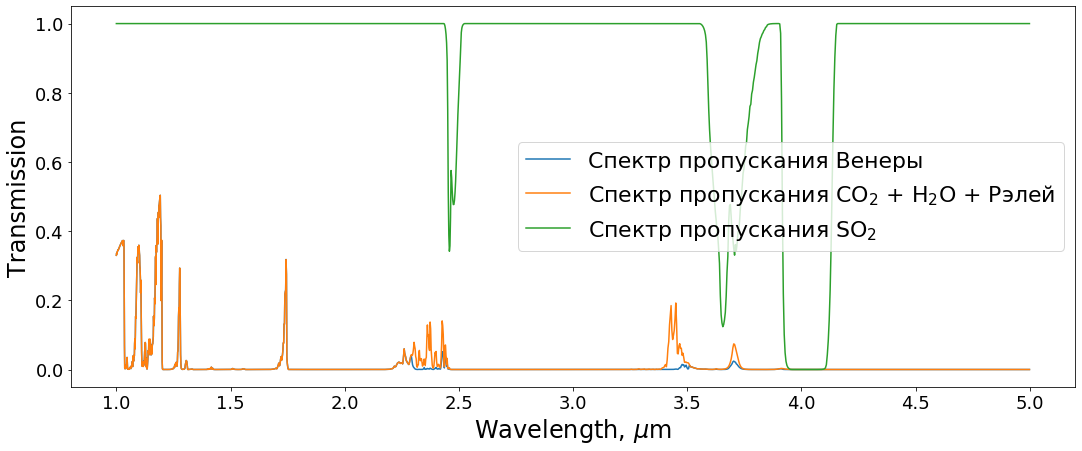

In [56]:
plt.figure(figsize=(18,7))
plt.plot(venus[:,0], venus[:,1])
plt.plot(venus[:,0], venus[:,2]*venus[:,7]*venus[:,-2])
plt.plot(venus[:,0], venus[:,6])

plt.xlabel('Wavelength, $\mu$m', fontsize=24)
ax=plt.gca()
ax.tick_params(labelsize=18)
plt.ylabel('Transmission', fontsize=24)
plt.legend(['Спектр пропускания Венеры', 'Спектр пропускания CO$_2$ + H$_2$O + Рэлей','Спектр пропускания SO$_2$'], fontsize=22)
#plt.xlim([1,2])

In [75]:
titan = np.loadtxt('data/titan.txt', skiprows=2)

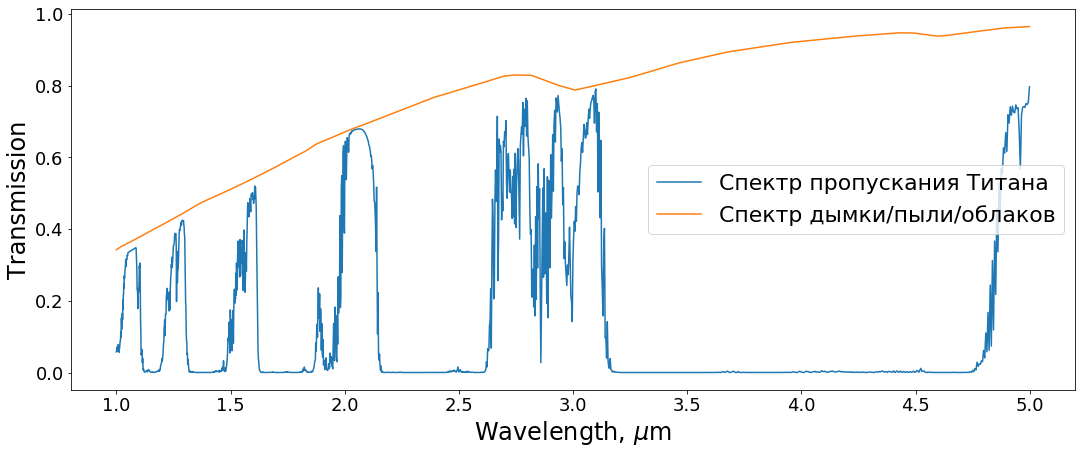

In [59]:
plt.figure(figsize=(18,7))
plt.plot(titan[:,0], titan[:,1])
plt.plot(titan[:,0], titan[:,-3])

plt.xlabel('Wavelength, $\mu$m', fontsize=24)
ax=plt.gca()
ax.tick_params(labelsize=18)
plt.ylabel('Transmission', fontsize=24)
plt.legend(['Спектр пропускания Титана', 'Спектр дымки/пыли/облаков'], fontsize=22)
#plt.xlim([1,2])

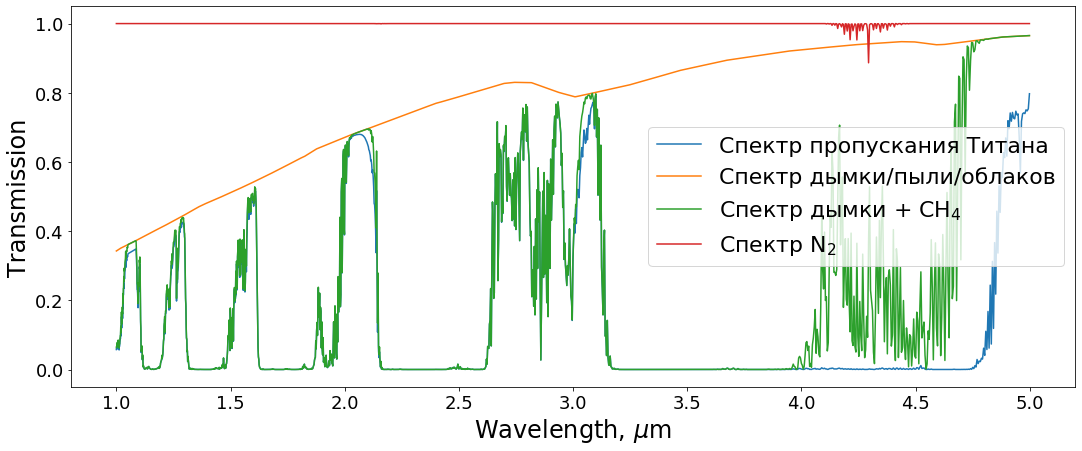

In [82]:
plt.figure(figsize=(18,7))
plt.plot(titan[:,0], titan[:,1])
plt.plot(titan[:,0], titan[:,-3])
plt.plot(titan[:,0], titan[:,3]*titan[:,-3])
plt.plot(titan[:,0], titan[:,2])
#plt.plot(titan[:,0], titan[:,4])

plt.xlabel('Wavelength, $\mu$m', fontsize=24)
ax=plt.gca()
ax.tick_params(labelsize=18)
plt.ylabel('Transmission', fontsize=24)
plt.legend(['Спектр пропускания Титана', 'Спектр дымки/пыли/облаков', 'Спектр дымки + CH$_4$', 'Спектр N$_2$'], fontsize=22)
#plt.xlim([1,2])

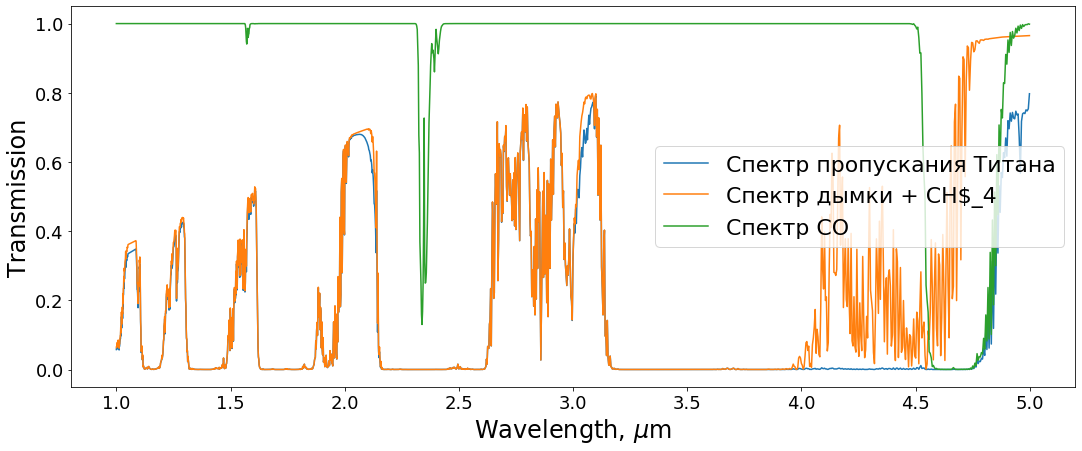

In [85]:
plt.figure(figsize=(18,7))
plt.plot(titan[:,0], titan[:,1])
plt.plot(titan[:,0], titan[:,3]*titan[:,-3]*titan[:,2])
plt.plot(titan[:,0], titan[:,4])

plt.xlabel('Wavelength, $\mu$m', fontsize=24)
ax=plt.gca()
ax.tick_params(labelsize=18)
plt.ylabel('Transmission', fontsize=24)
plt.legend(['Спектр пропускания Титана', 'Спектр дымки + CH$_4', 'Спектр CO'], fontsize=22)
#plt.xlim([1,2])

In [51]:
earth = np.loadtxt('data/earth.txt', skiprows=2)

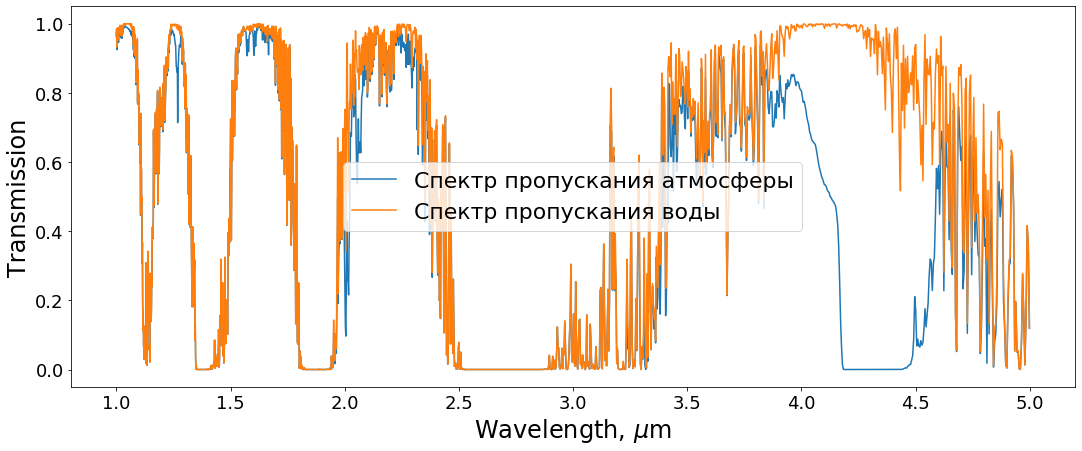

In [52]:
plt.figure(figsize=(18,7))
plt.plot(earth[:,0], earth[:,1])
plt.plot(earth[:,0], earth[:,2])


plt.xlabel('Wavelength, $\mu$m', fontsize=24)
ax=plt.gca()
ax.tick_params(labelsize=18)
plt.ylabel('Transmission', fontsize=24)
plt.legend(['Спектр пропускания атмосферы', 'Спектр пропускания воды'], fontsize=22)
#plt.xlim([1,2])

(1, 2.3)

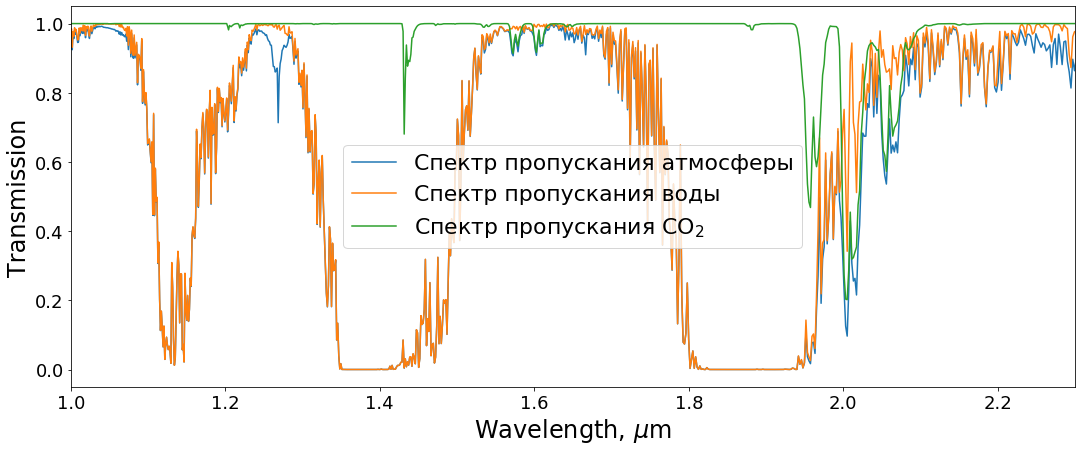

In [80]:
plt.figure(figsize=(18,7))
plt.plot(earth[:,0], earth[:,1])
plt.plot(earth[:,0], earth[:,2])
plt.plot(earth[:,0], earth[:,3])
#plt.plot(earth[:,0], earth[:,6])


plt.xlabel('Wavelength, $\mu$m', fontsize=24)
ax=plt.gca()
ax.tick_params(labelsize=18)
plt.ylabel('Transmission', fontsize=24)
plt.legend(['Спектр пропускания атмосферы', 'Спектр пропускания воды', 'Спектр пропускания CO$_2$'], fontsize=22)
plt.xlim([1,2.3])

(2.2, 5)

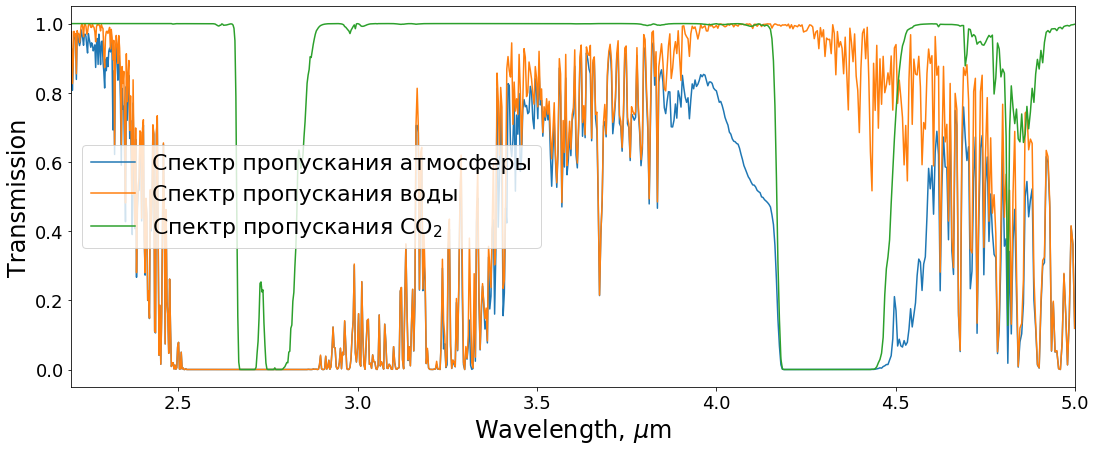

In [69]:
plt.figure(figsize=(18,7))
plt.plot(earth[:,0], earth[:,1])
plt.plot(earth[:,0], earth[:,2])
plt.plot(earth[:,0], earth[:,3])
#plt.plot(earth[:,0], earth[:,6])


plt.xlabel('Wavelength, $\mu$m', fontsize=24)
ax=plt.gca()
ax.tick_params(labelsize=18)
plt.ylabel('Transmission', fontsize=24)
plt.legend(['Спектр пропускания атмосферы', 'Спектр пропускания воды', 'Спектр пропускания CO$_2$'], fontsize=22)
plt.xlim([2.2,5])

(1, 2)

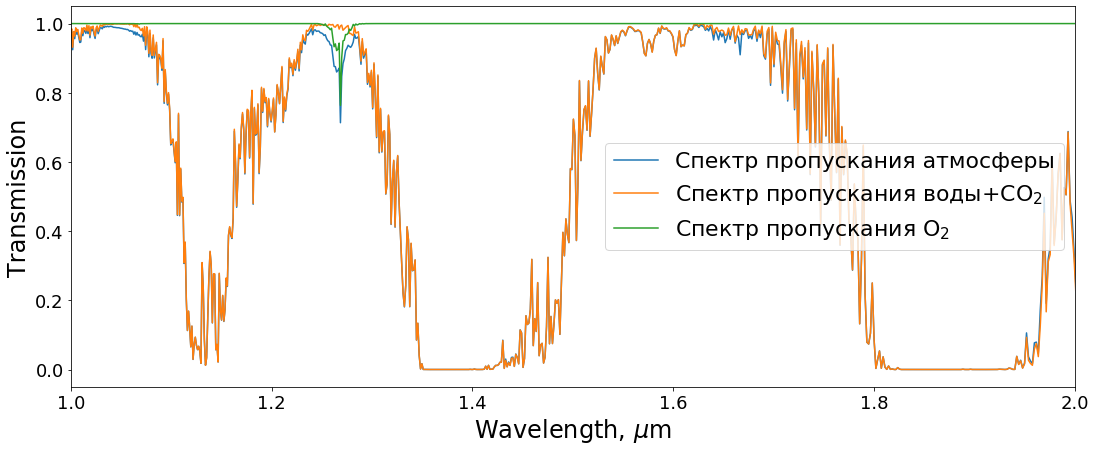

In [73]:
plt.figure(figsize=(18,7))
plt.plot(earth[:,0], earth[:,1])
plt.plot(earth[:,0], earth[:,2]*earth[:,3])
plt.plot(earth[:,0], earth[:,8])


plt.xlabel('Wavelength, $\mu$m', fontsize=24)
ax=plt.gca()
ax.tick_params(labelsize=18)
plt.ylabel('Transmission', fontsize=24)
plt.legend(['Спектр пропускания атмосферы', 'Спектр пропускания воды+CO$_2$','Спектр пропускания O$_2$'], fontsize=22)
plt.xlim([1,2])

In [ ]:
plt.figure(figsize=(18,7))
plt.plot(earth[:,0], earth[:,1])
plt.plot(earth[:,0], earth[:,2])
#plt.plot(earth[:,0], earth[:,3])


plt.xlabel('Wavelength, $\mu$m', fontsize=24)
ax=plt.gca()
ax.tick_params(labelsize=18)
plt.ylabel('Transmission', fontsize=24)
#plt.legend(['Спектр пропускания атмосферы', 'Спектр пропускания воды'], fontsize=22)
#plt.xlim([1,2])

(2.2, 5)

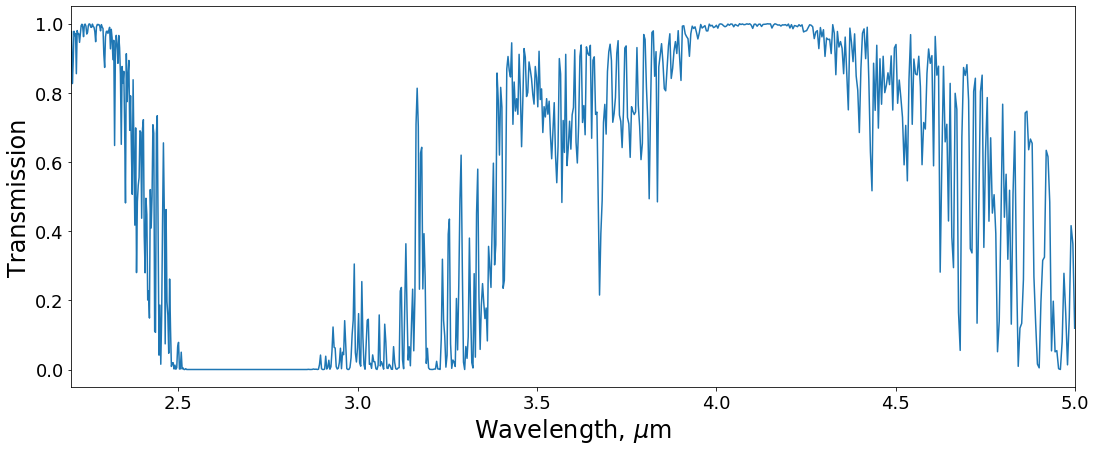

In [90]:
plt.figure(figsize=(18,7))
#plt.plot(earth[:,0], earth[:,1])
plt.plot(earth[:,0], earth[:,2])
#plt.plot(earth[:,0], earth[:,3])
#plt.plot(earth[:,0], earth[:,6])


plt.xlabel('Wavelength, $\mu$m', fontsize=24)
ax=plt.gca()
ax.tick_params(labelsize=18)
plt.ylabel('Transmission', fontsize=24)
#plt.legend(['Спектр пропускания атмосферы', 'Спектр пропускания воды', 'Спектр пропускания CO$_2$'], fontsize=22)
plt.xlim([2.2, 5])

In [77]:
mars_co2 = np.loadtxt('data/mars_big_co2.txt', skiprows=2)

(1, 2.2)

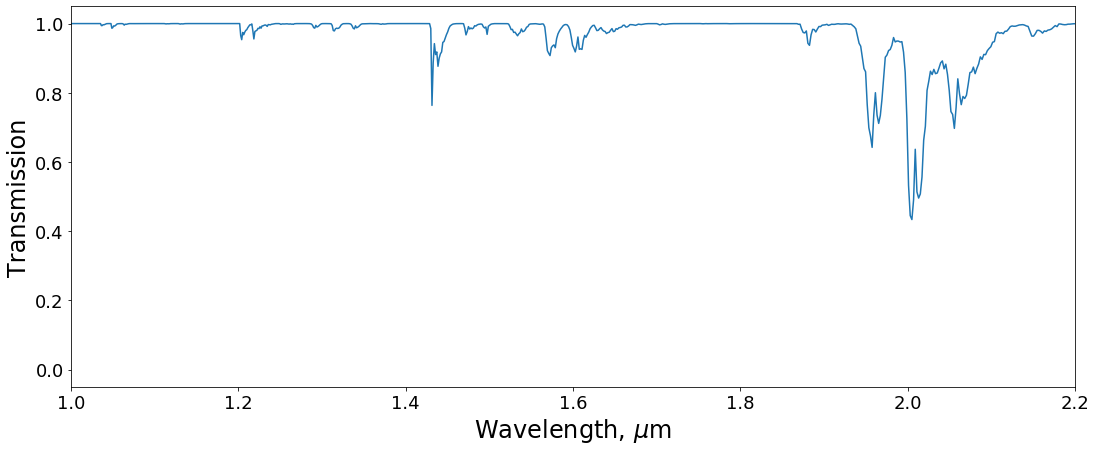

In [103]:
plt.figure(figsize=(18,7))
#plt.plot(earth[:,0], earth[:,1])
plt.plot(mars_co2[:,0], mars_co2[:,2])


plt.xlabel('Wavelength, $\mu$m', fontsize=24)
ax=plt.gca()
ax.tick_params(labelsize=18)
plt.ylabel('Transmission', fontsize=24)
#plt.legend(['Спектр пропускания атмосферы', 'Спектр пропускания воды', 'Спектр пропускания CO$_2$'], fontsize=22)
plt.xlim([1, 2.2])

(2.2, 5)

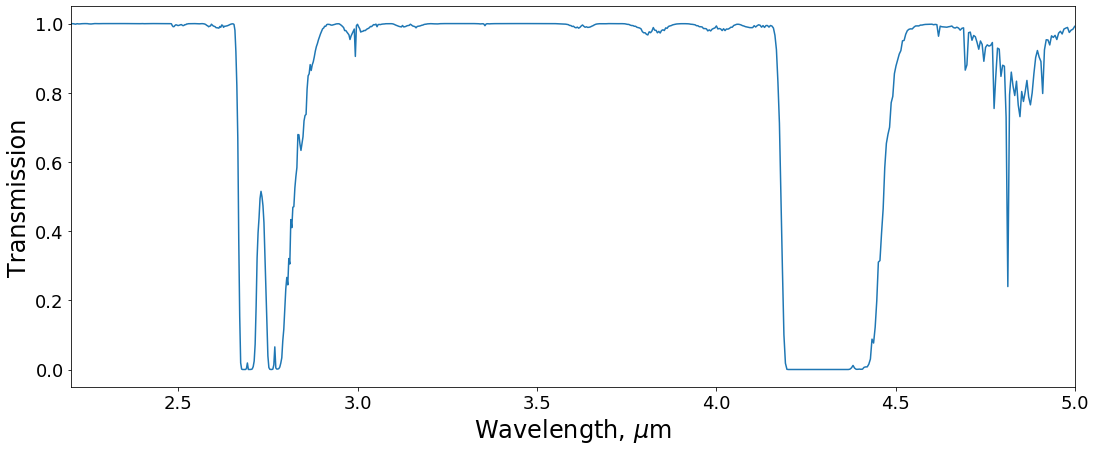

In [96]:
plt.figure(figsize=(18,7))
#plt.plot(earth[:,0], earth[:,1])
plt.plot(mars_co2[:,0], mars_co2[:,2])


plt.xlabel('Wavelength, $\mu$m', fontsize=24)
ax=plt.gca()
ax.tick_params(labelsize=18)
plt.ylabel('Transmission', fontsize=24)
#plt.legend(['Спектр пропускания атмосферы', 'Спектр пропускания воды', 'Спектр пропускания CO$_2$'], fontsize=22)
plt.xlim([2.2, 5])

In [101]:
venus_co2 = np.loadtxt('data/venus_small_co2.txt', skiprows=2)

(1, 2.2)

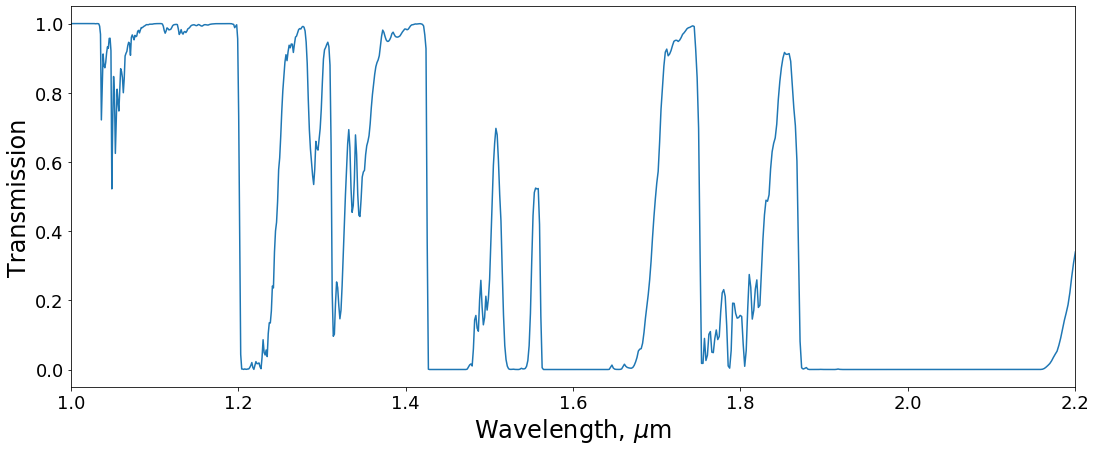

In [102]:
plt.figure(figsize=(18,7))
#plt.plot(earth[:,0], earth[:,1])
plt.plot(venus_co2[:,0], venus_co2[:,2])


plt.xlabel('Wavelength, $\mu$m', fontsize=24)
ax=plt.gca()
ax.tick_params(labelsize=18)
plt.ylabel('Transmission', fontsize=24)
#plt.legend(['Спектр пропускания атмосферы', 'Спектр пропускания воды', 'Спектр пропускания CO$_2$'], fontsize=22)
plt.xlim([1, 2.2])

(2.2, 5)

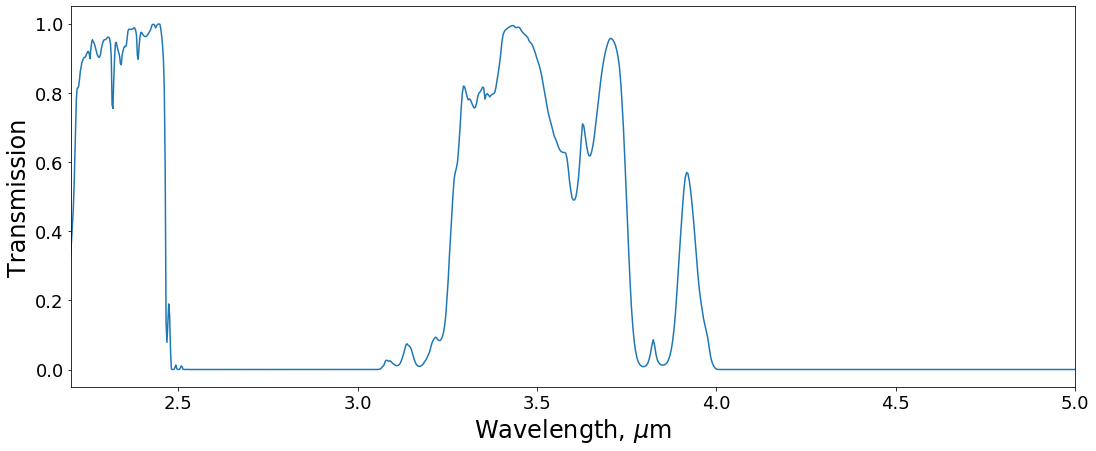

In [104]:
plt.figure(figsize=(18,7))
#plt.plot(earth[:,0], earth[:,1])
plt.plot(venus_co2[:,0], venus_co2[:,2])


plt.xlabel('Wavelength, $\mu$m', fontsize=24)
ax=plt.gca()
ax.tick_params(labelsize=18)
plt.ylabel('Transmission', fontsize=24)
#plt.legend(['Спектр пропускания атмосферы', 'Спектр пропускания воды', 'Спектр пропускания CO$_2$'], fontsize=22)
plt.xlim([2.2, 5])

(1, 2.1)

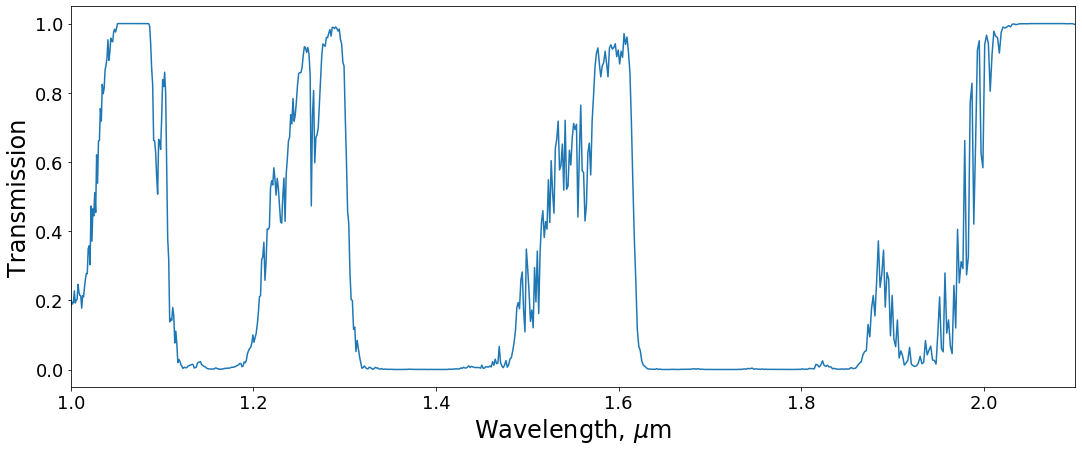

In [109]:
plt.figure(figsize=(18,7))
#plt.plot(earth[:,0], earth[:,1])
plt.plot(titan[:,0], titan[:,3])


plt.xlabel('Wavelength, $\mu$m', fontsize=24)
ax=plt.gca()
ax.tick_params(labelsize=18)
plt.ylabel('Transmission', fontsize=24)
#plt.legend(['Спектр пропускания атмосферы', 'Спектр пропускания воды', 'Спектр пропускания CO$_2$'], fontsize=22)
plt.xlim([1, 2.1])

(2, 5)

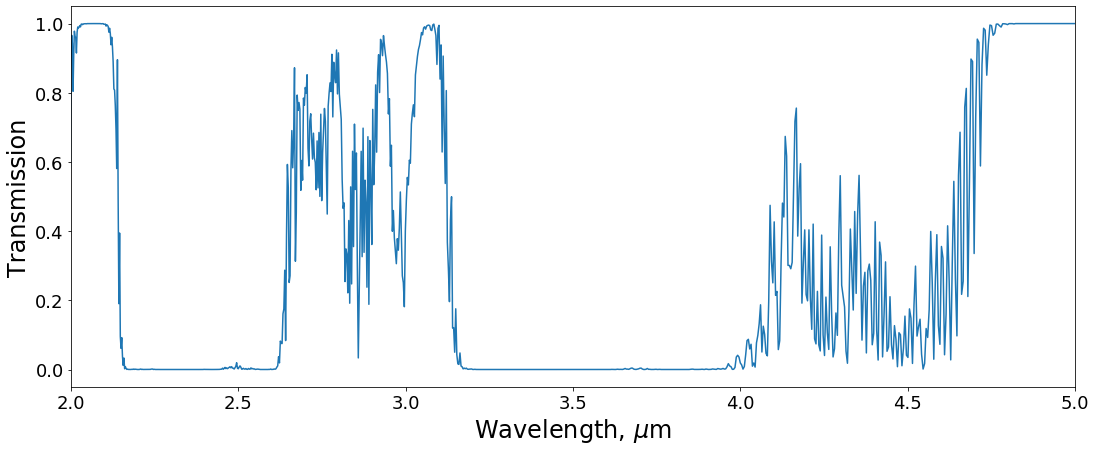

In [111]:
plt.figure(figsize=(18,7))
#plt.plot(earth[:,0], earth[:,1])
plt.plot(titan[:,0], titan[:,3])


plt.xlabel('Wavelength, $\mu$m', fontsize=24)
ax=plt.gca()
ax.tick_params(labelsize=18)
plt.ylabel('Transmission', fontsize=24)
#plt.legend(['Спектр пропускания атмосферы', 'Спектр пропускания воды', 'Спектр пропускания CO$_2$'], fontsize=22)
plt.xlim([2, 5])

(1, 2.1)

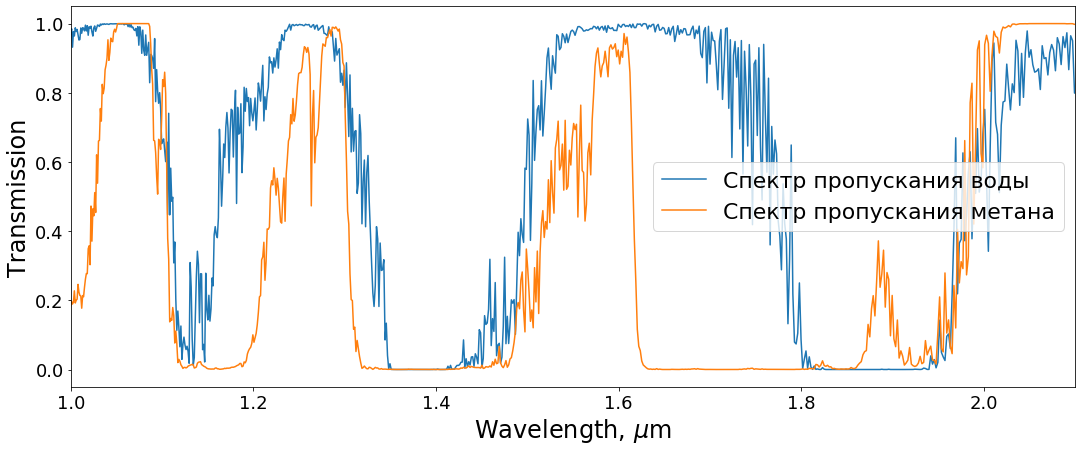

In [114]:
plt.figure(figsize=(18,7))
plt.plot(earth[:,0], earth[:,2])
plt.plot(titan[:,0], titan[:,3])


plt.xlabel('Wavelength, $\mu$m', fontsize=24)
ax=plt.gca()
ax.tick_params(labelsize=18)
plt.ylabel('Transmission', fontsize=24)
plt.legend(['Спектр пропускания воды', 'Спектр пропускания метана'], fontsize=22)
plt.xlim([1, 2.1])

(2.1, 5)

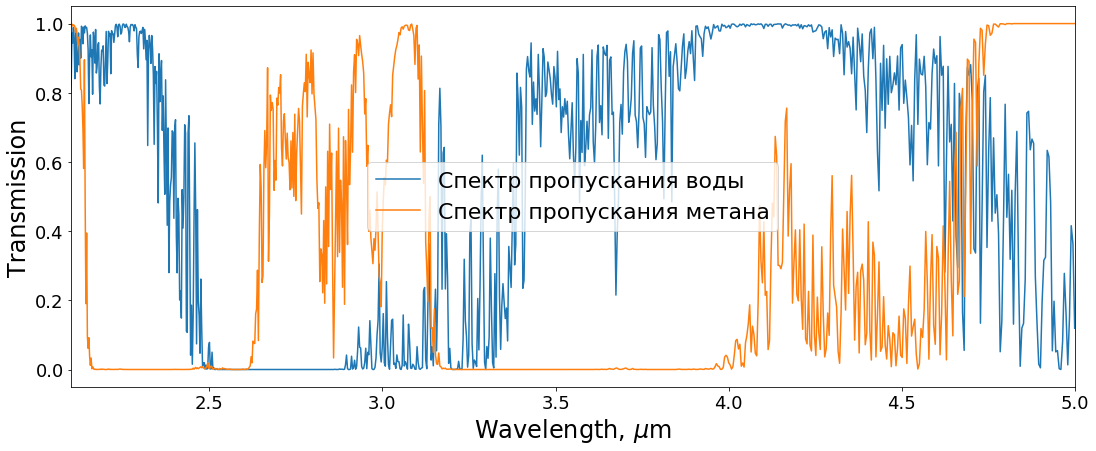

In [115]:
plt.figure(figsize=(18,7))
plt.plot(earth[:,0], earth[:,2])
plt.plot(titan[:,0], titan[:,3])


plt.xlabel('Wavelength, $\mu$m', fontsize=24)
ax=plt.gca()
ax.tick_params(labelsize=18)
plt.ylabel('Transmission', fontsize=24)
plt.legend(['Спектр пропускания воды', 'Спектр пропускания метана'], fontsize=22)
plt.xlim([2.1,5])

(1, 2.1)

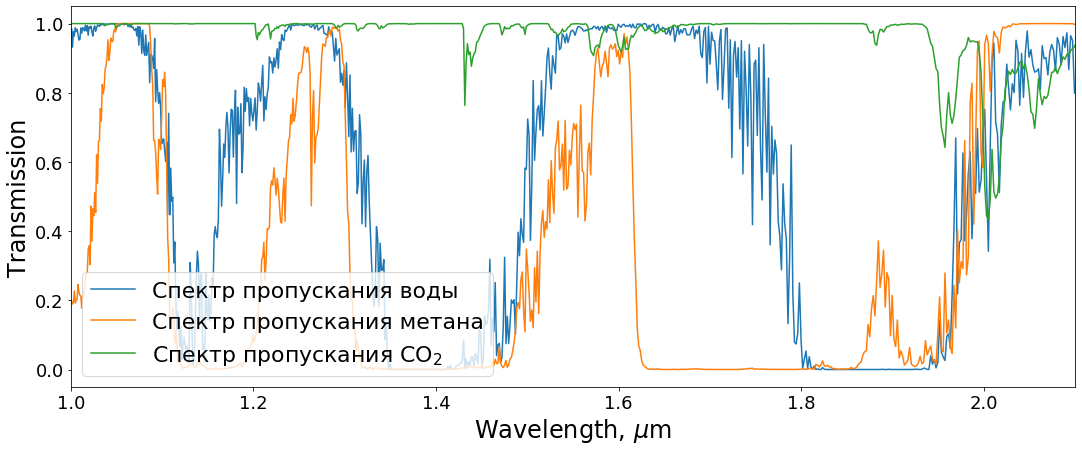

In [80]:
plt.figure(figsize=(18,7))
plt.plot(earth[:,0], earth[:,2])
plt.plot(titan[:,0], titan[:,3])
plt.plot(mars_co2[:,0], mars_co2[:,2])

plt.xlabel('Wavelength, $\mu$m', fontsize=24)
ax=plt.gca()
ax.tick_params(labelsize=18)
plt.ylabel('Transmission', fontsize=24)
plt.legend(['Спектр пропускания воды', 'Спектр пропускания метана', 'Спектр пропускания CO$_2$'], fontsize=22, loc='lower left')
plt.xlim([1, 2.1])

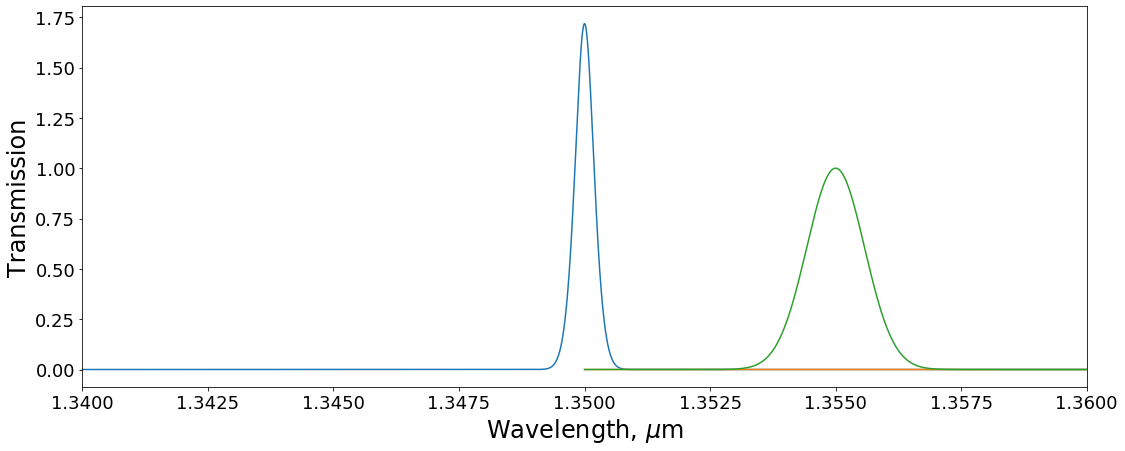

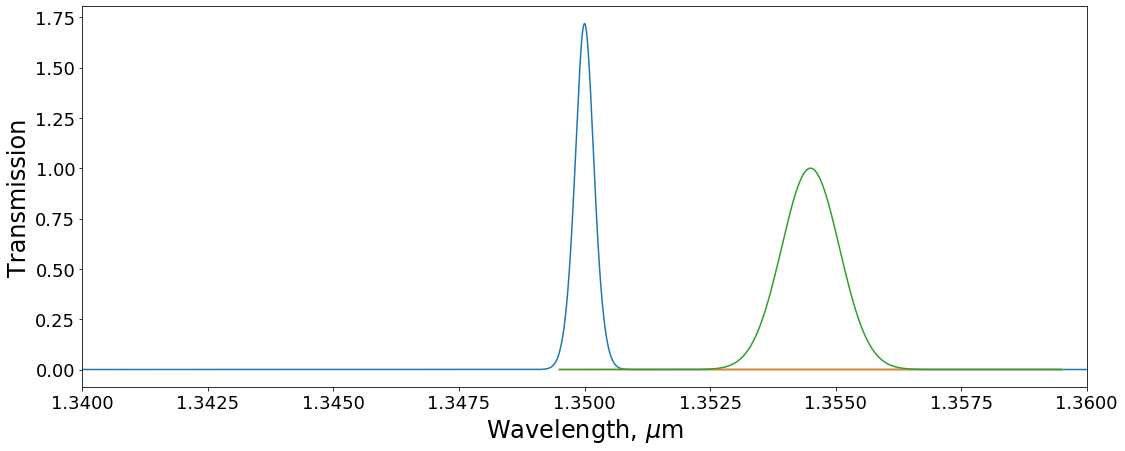

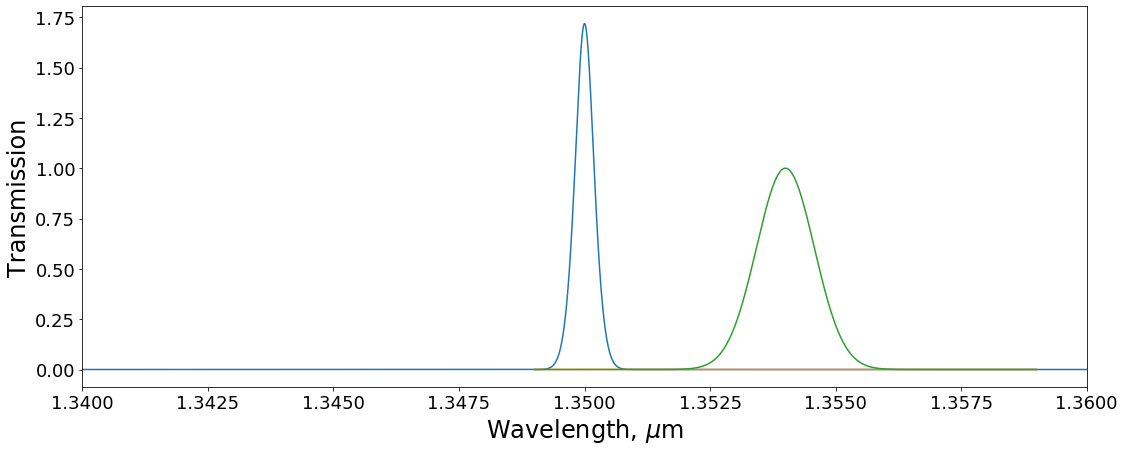

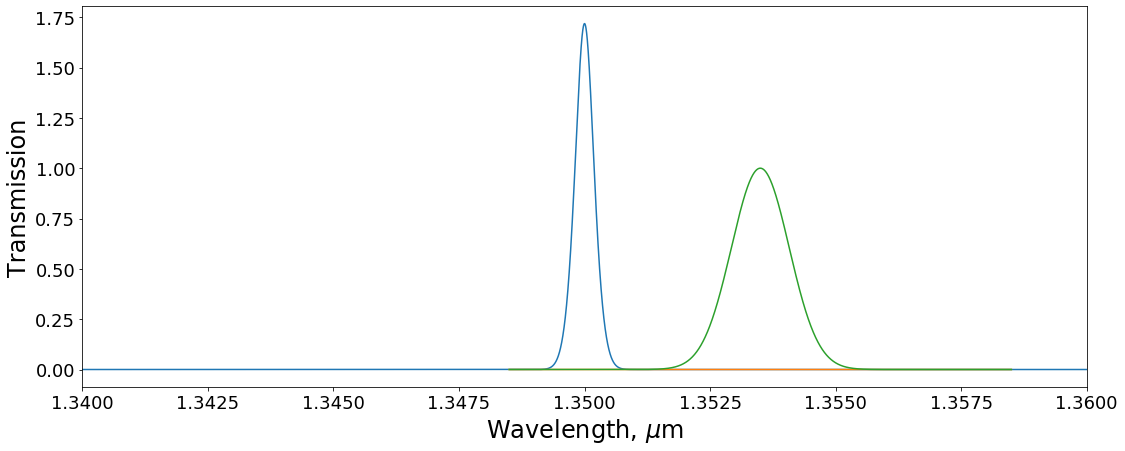

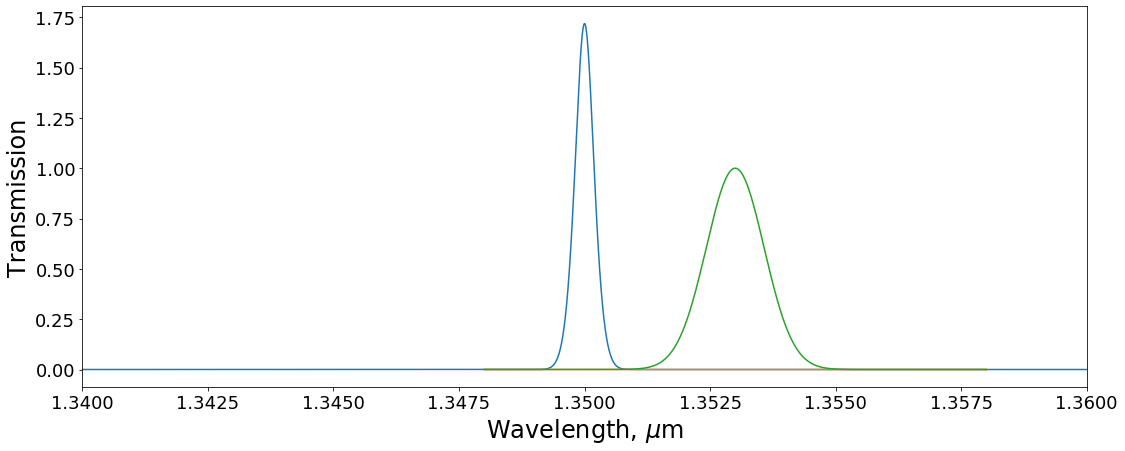

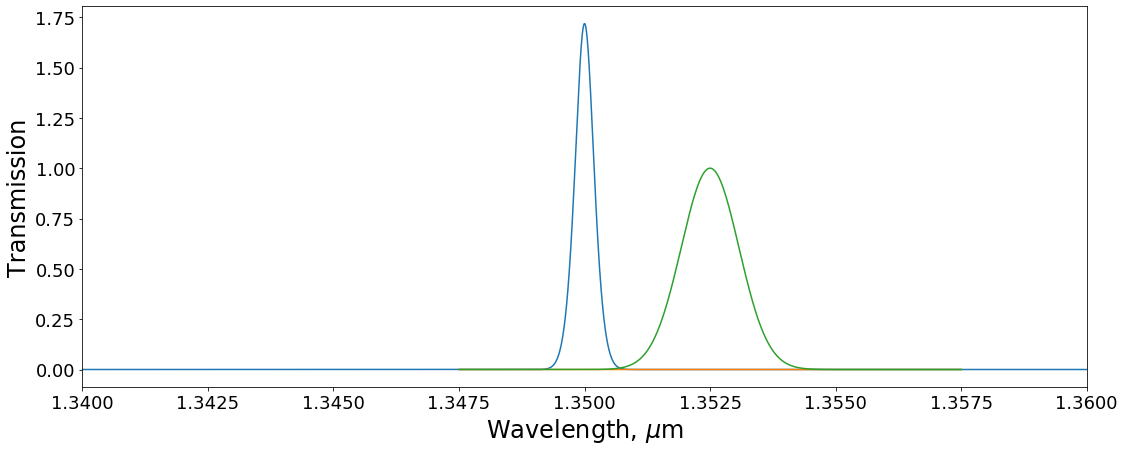

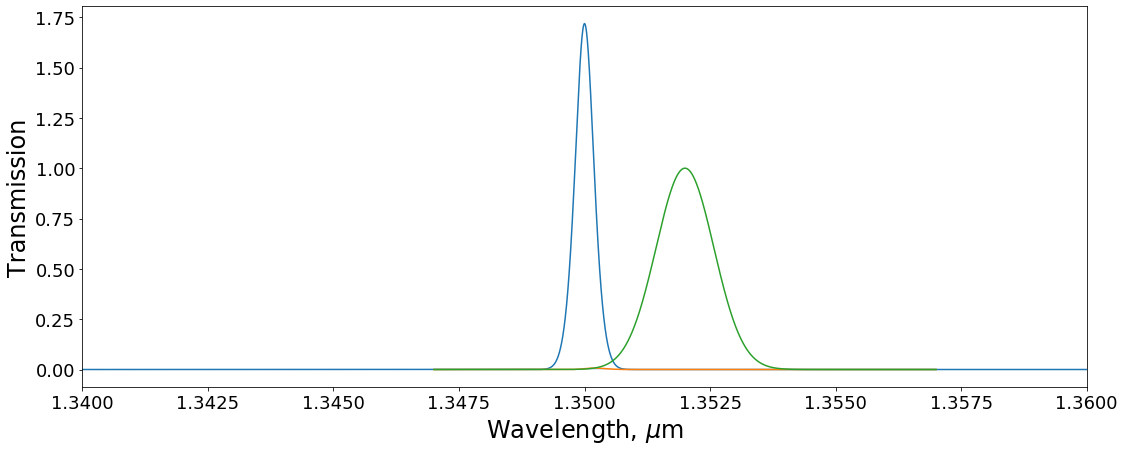

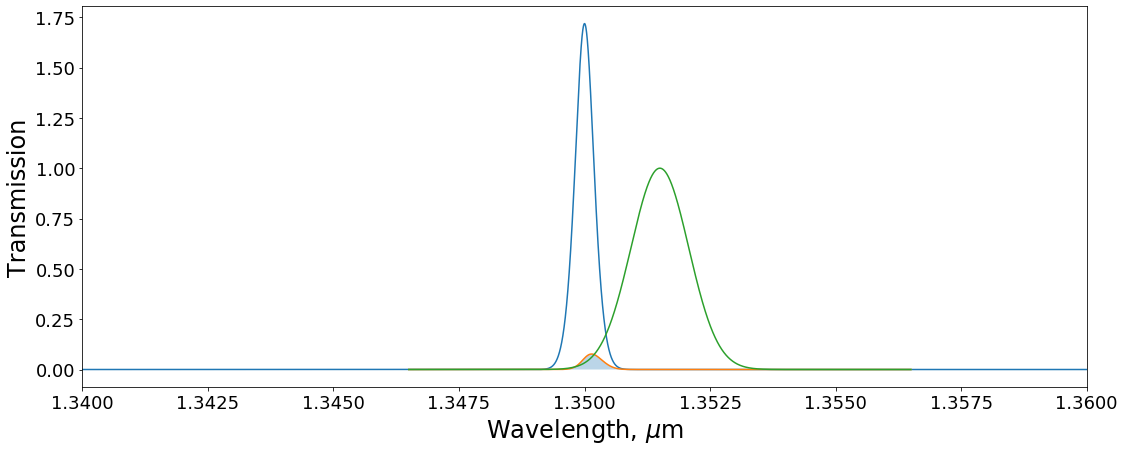

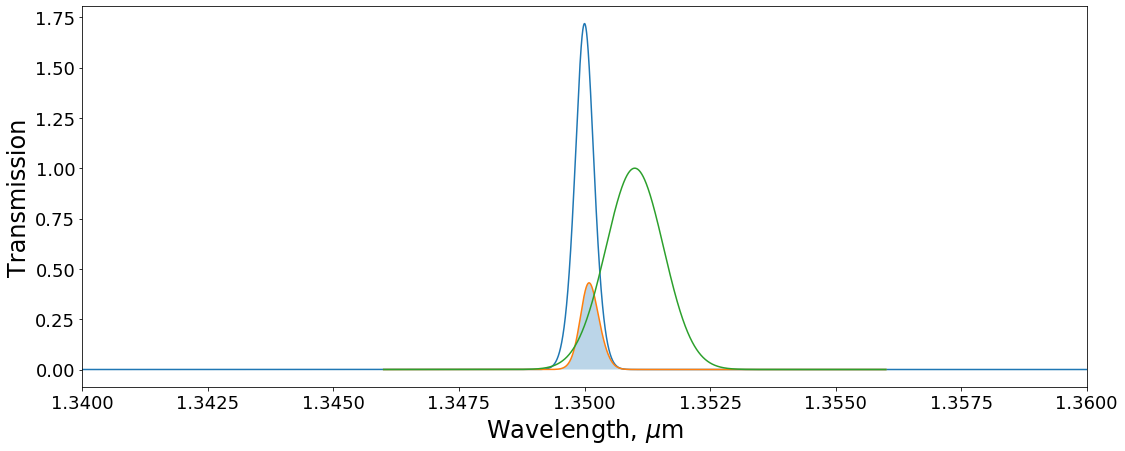

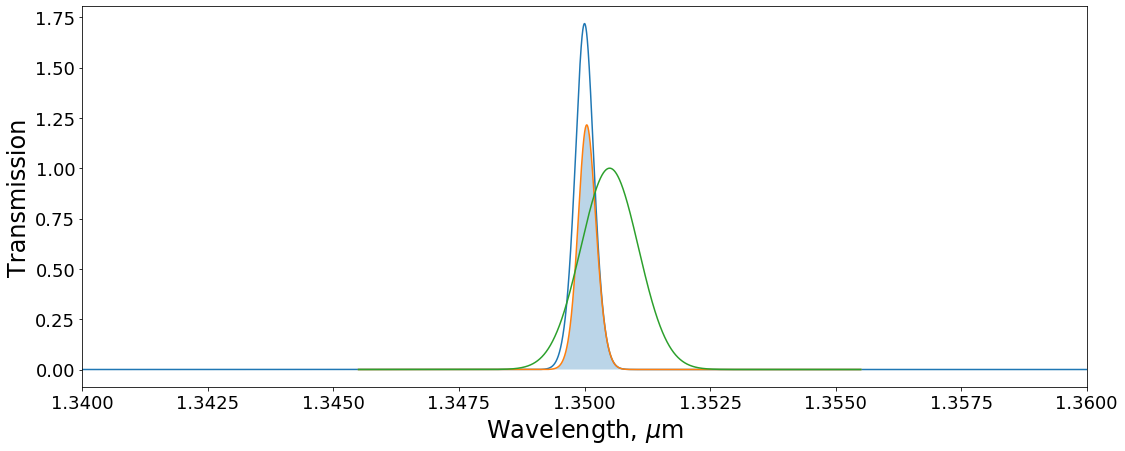

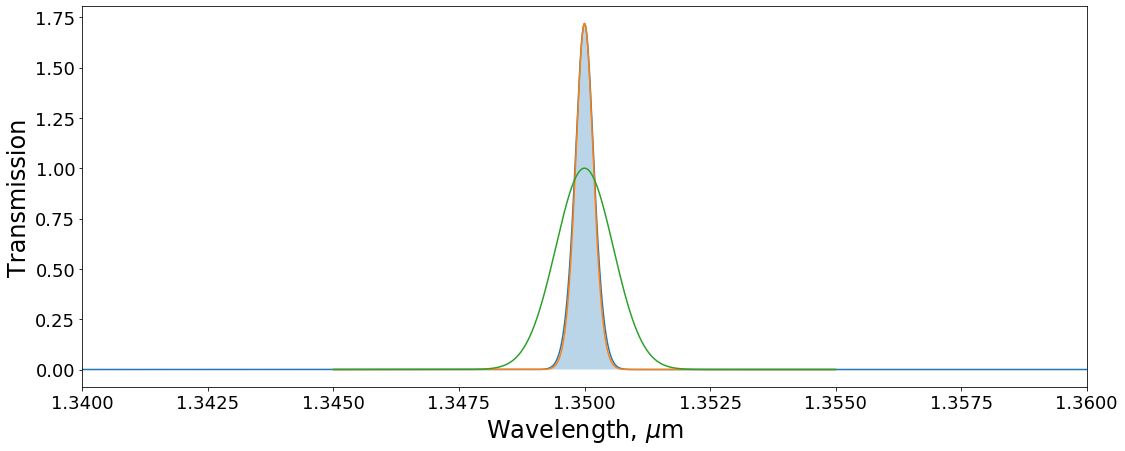

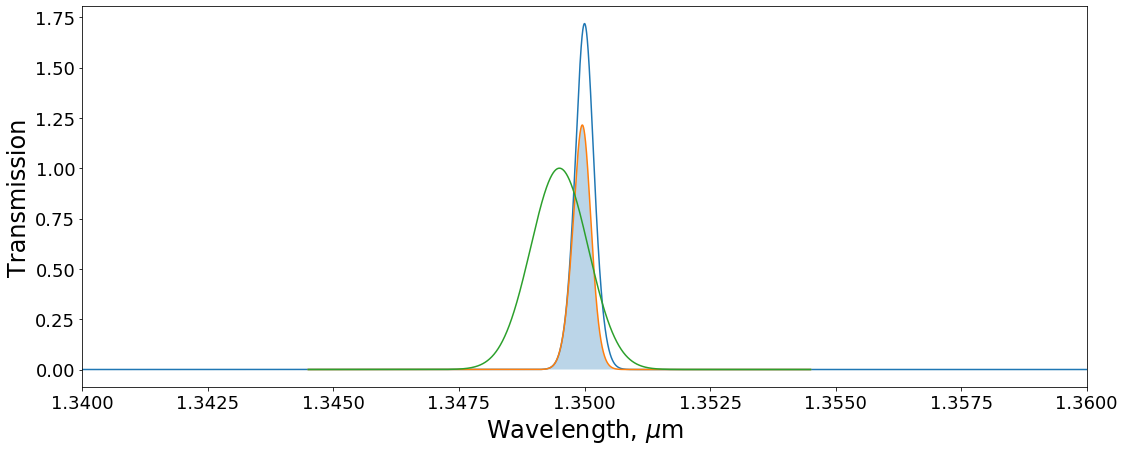

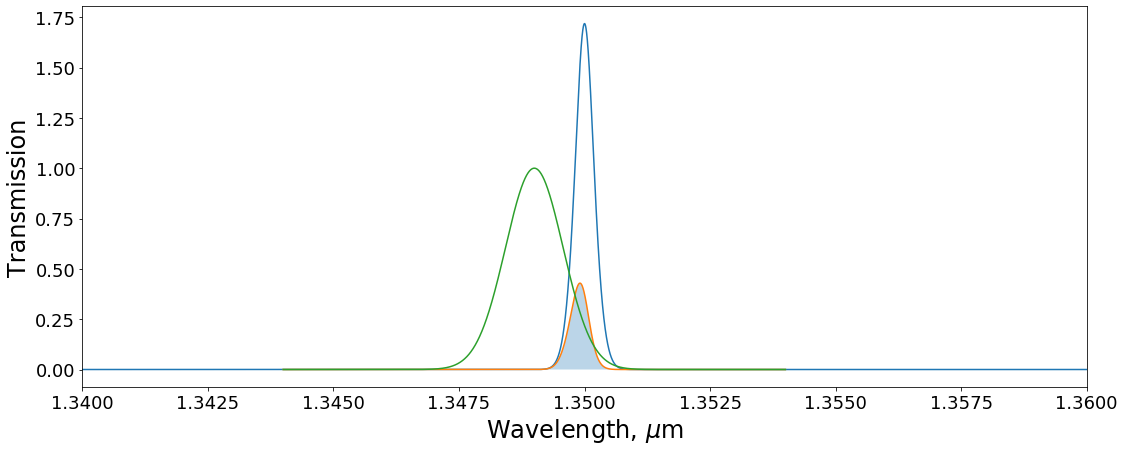

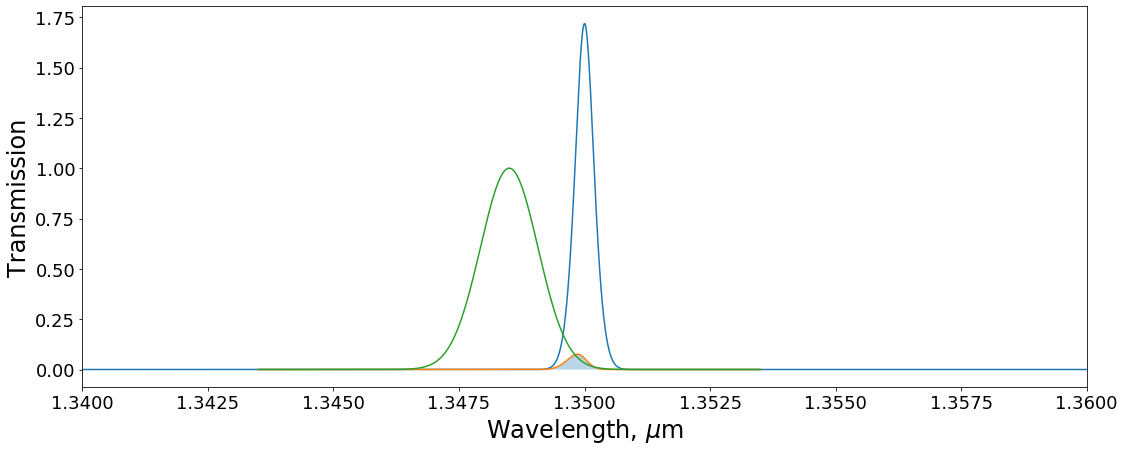

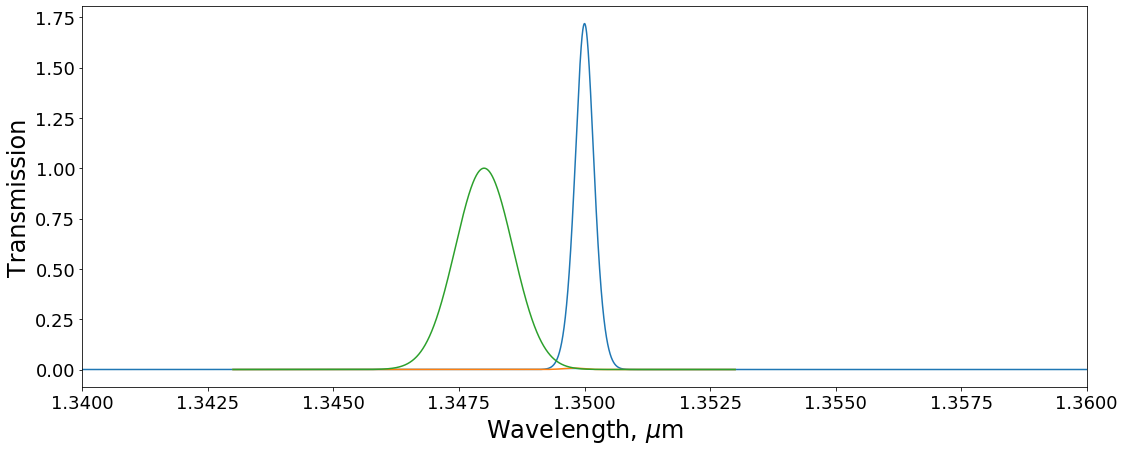

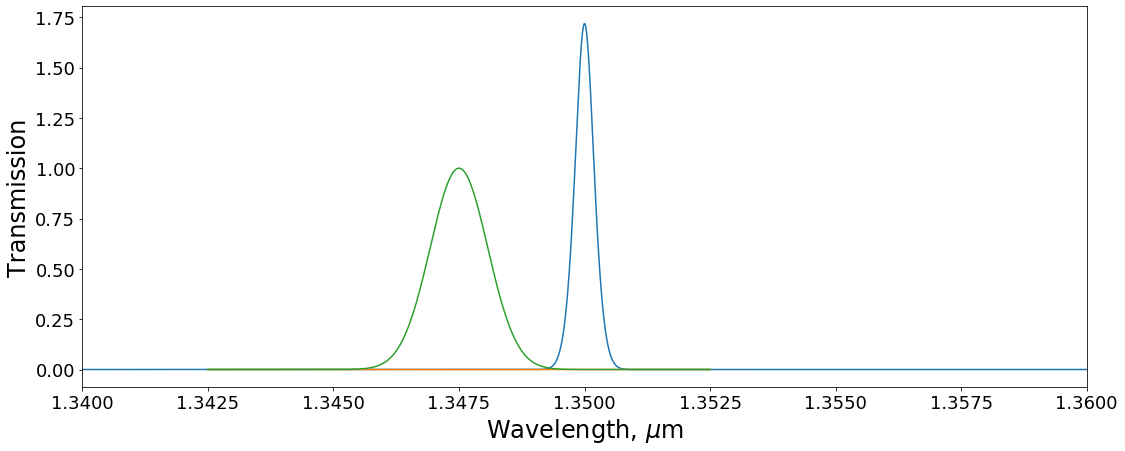

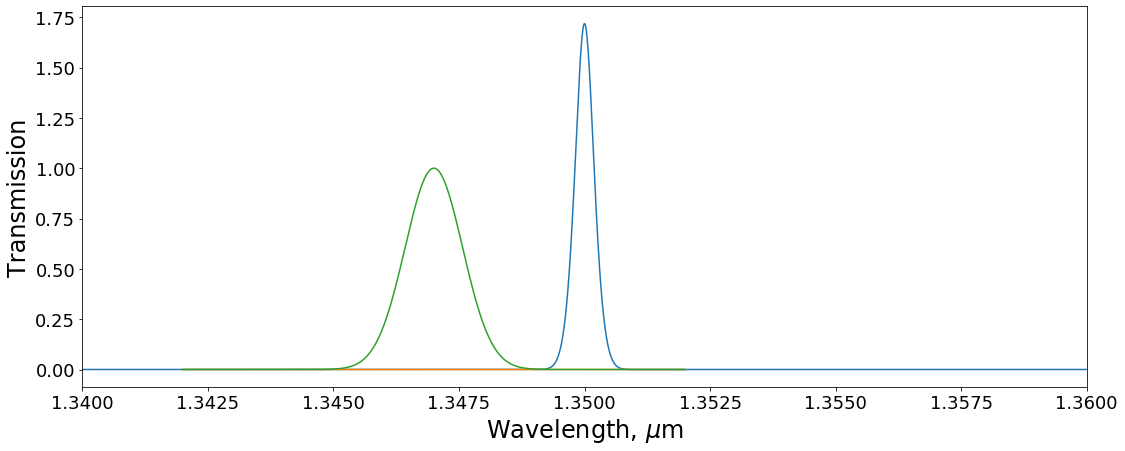

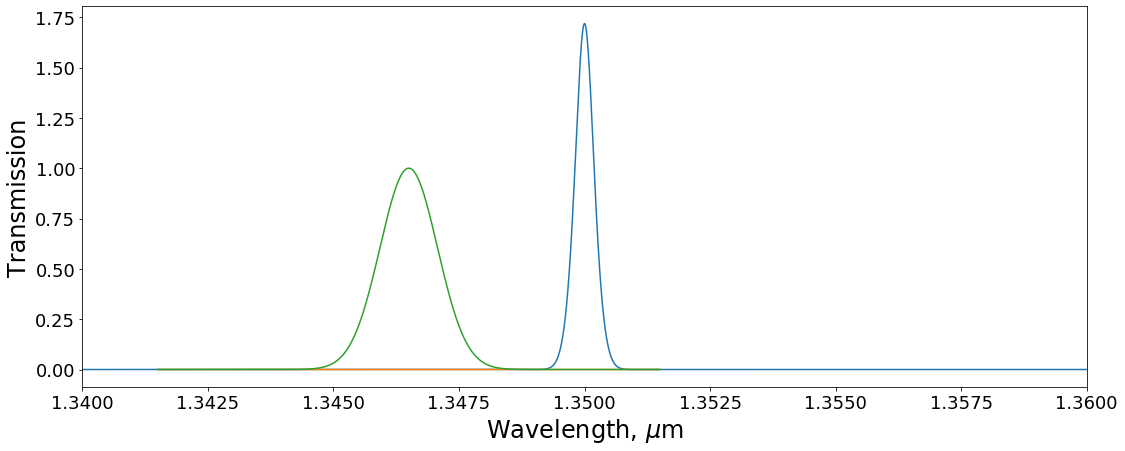

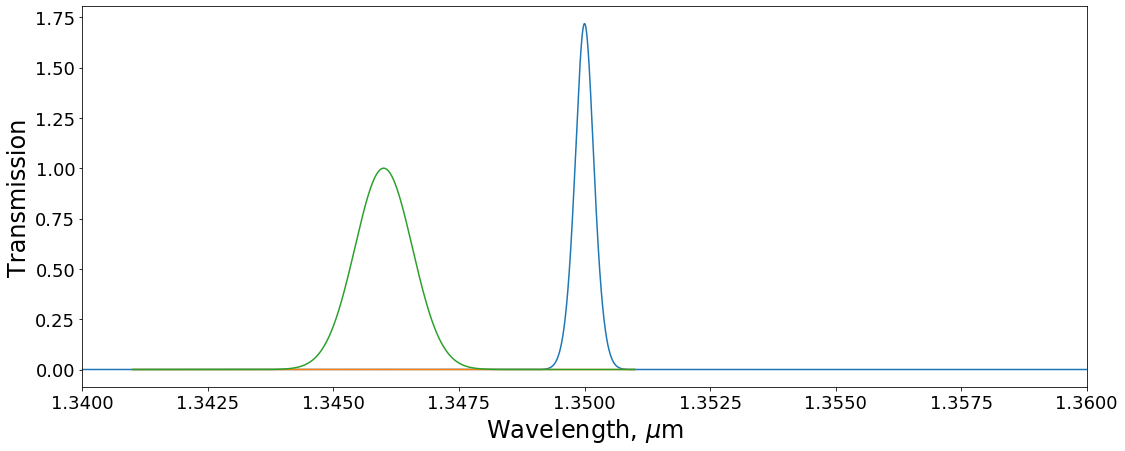

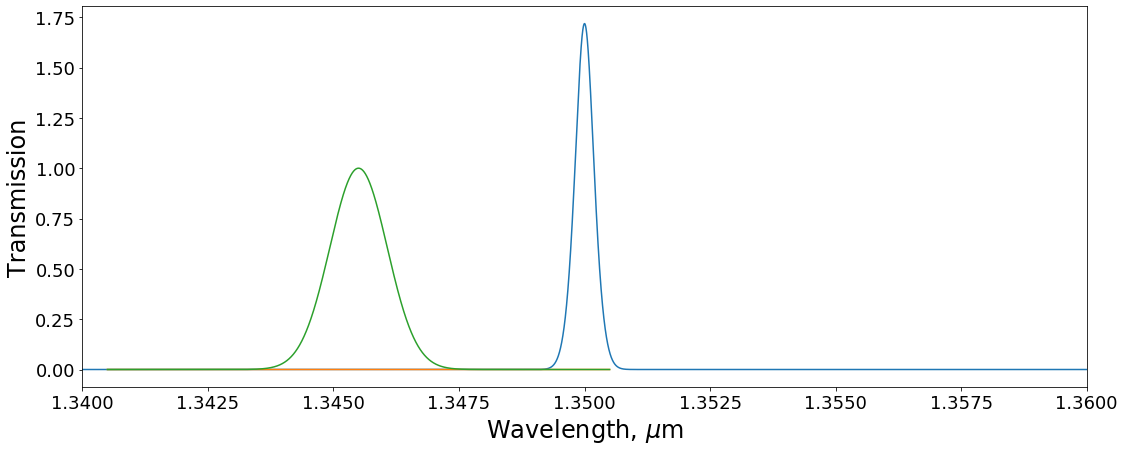

In [22]:
x = np.linspace(1.3, 1.4, 100000)
k = np.exp(-((x-1.35))**2/0.0000001)/1
G = np.exp(k)-1
g_int = interp1d(x, G)
for dt in np.arange(-0.005,0.005,0.0005):
    plt.figure(figsize=(18,7))
    plt.plot(x, G)
    plt.plot(x_psf-dt, make_psf(x_psf-dt, 1.35-dt, R)*g_int(x_psf-dt))
    plt.plot(x_psf-dt, make_psf(x_psf-dt, 1.35-dt, R))
    plt.fill_between(x_psf-dt, make_psf(x_psf-dt, 1.35-dt, 1000)*g_int(x_psf-dt), alpha=0.3)
    plt.xlabel('Wavelength, $\mu$m', fontsize=24)
    plt.ylabel('Transmission', fontsize=24)
    ax=plt.gca()
    ax.tick_params(labelsize=18)
    plt.xlim([1.34,1.36])

In [4]:
def square(x_psf, mu, width):
    y = np.zeros(len(x_psf))
    y[(x_psf<mu+width/2)&(x_psf>mu-width/2)] = 1 
 
    return y
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
def make_psf(x_psf, mu, R):
    return gaussian(x_psf, mu, mu/(R * 2*np.sqrt(2*np.log(2))))
x_psf = x[50000-5000:50000+5000]

In [23]:
x = np.linspace(1.3, 1.4, 100000)
k = np.exp(-((x-1.35))**2/0.000001)/1
G = np.exp(k)-1
G = G/np.max(G)
g_int = interp1d(x, G)
dts = np.linspace(0.004,-0.004,200)
res = np.zeros_like(dts)
res_wv = np.zeros_like(dts)
for i in range(len(dts)):
    dt = dts[i]
    plt.figure(figsize=(18,7))
    plt.plot(x, G)
    res_wv = np.append(res_wv, x_psf.mean()-dt)
    res = np.append(res, np.sum(square(x_psf-dt, 1.35-dt, 0.0005)*g_int(x_psf-dt))/np.sum(square(x_psf-dt, 1.35-dt, 0.0005)))
    plt.fill_between(x_psf-dt, square(x_psf-dt, 1.35-dt, 0.0005)*g_int(x_psf-dt), alpha=0.3)
    plt.plot(x_psf-dt, square(x_psf-dt, 1.35-dt, 0.0005))
    plt.plot(res_wv, res, 'k')
    plt.xlabel('Wavelength, $\mu$m', fontsize=24)
    plt.ylabel('Transmission', fontsize=24)
    ax=plt.gca()
    ax.tick_params(labelsize=18)
    plt.xlim([1.345,1.355])
    plt.savefig('movie/square/'+str(i).zfill(3)+'.jpg')
    plt.cla()
    plt.close()

In [25]:
x = np.linspace(1.3, 1.4, 100000)
k = np.exp(-((x-1.35))**2/0.000000001)/1
G = np.exp(k)-1
G = G/np.max(G)
g_int = interp1d(x, G)
dts = np.linspace(0.002,-0.002,200)
res = np.zeros_like(dts)
res_wv = np.zeros_like(dts)
for i in range(len(dts)):
    dt = dts[i]
    plt.figure(figsize=(18,7))
    plt.plot(x, G)
    res_wv = np.append(res_wv, x_psf.mean()-dt)
    res = np.append(res, np.sum(make_psf(x_psf-dt, 1.35-dt, 1000)*g_int(x_psf-dt))/np.sum(make_psf(x_psf-dt, 1.35-dt, 1000)))
    plt.fill_between(x_psf-dt, make_psf(x_psf-dt, 1.35-dt, 1000)*g_int(x_psf-dt), alpha=0.3)
    plt.plot(x_psf-dt, make_psf(x_psf-dt, 1.35-dt, 1000))
    plt.plot(res_wv, res, 'k')
    plt.xlabel('Wavelength, $\mu$m', fontsize=24)
    plt.ylabel('Transmission', fontsize=24)
    ax=plt.gca()
    ax.tick_params(labelsize=18)
    plt.xlim([1.345,1.355])
    plt.savefig('movie/gauss/'+str(i).zfill(3)+'.jpg')
    plt.cla()
    plt.close()

In [41]:
earth_water_example = np.loadtxt('data/earth_very_low_water.txt', skiprows=2)

(-0.1, 1.05)

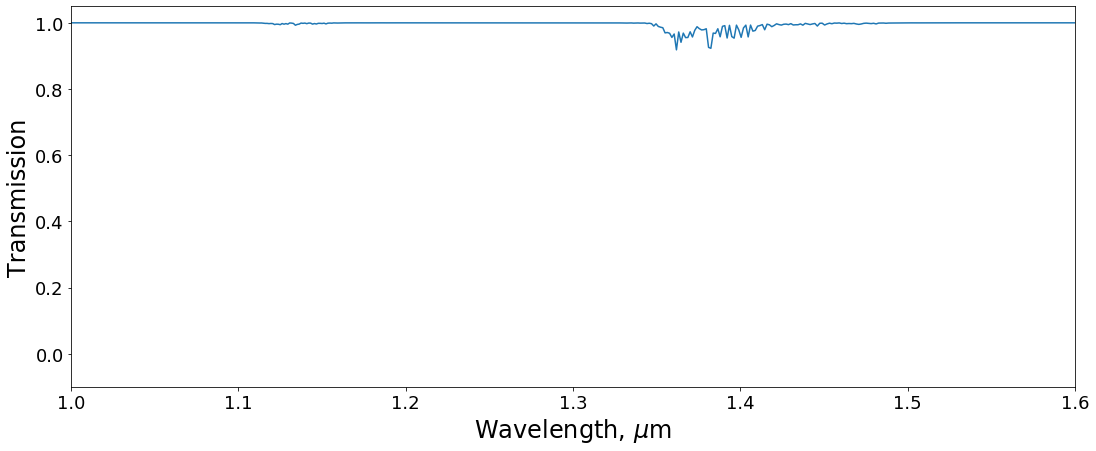

In [45]:
plt.figure(figsize=(18,7))
plt.plot(earth_water_example[:,0], earth_water_example[:,2])
#plt.plot(titan[:,0], titan[:,3])


plt.xlabel('Wavelength, $\mu$m', fontsize=24)
ax=plt.gca()
ax.tick_params(labelsize=18)
plt.ylabel('Transmission', fontsize=24)
#plt.legend(['Спектр пропускания воды', 'Спектр пропускания метана'], fontsize=22)
plt.xlim([1, 1.6])
plt.ylim([-0.1, 1.05])

In [39]:
earth_water_example = np.loadtxt('data/earth_low_water.txt', skiprows=2)

(1, 1.6)

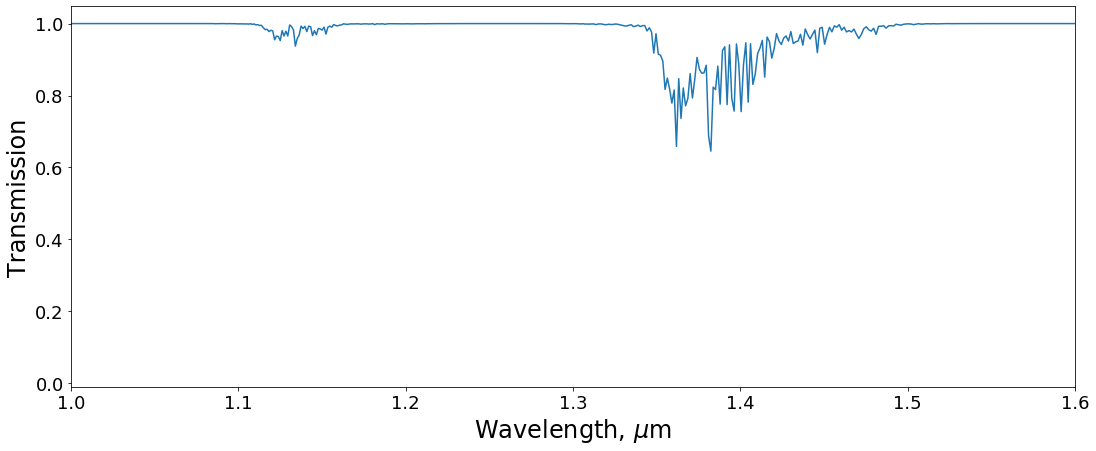

In [40]:
plt.figure(figsize=(18,7))
plt.plot(earth_water_example[:,0], earth_water_example[:,2])
#plt.plot(titan[:,0], titan[:,3])


plt.xlabel('Wavelength, $\mu$m', fontsize=24)
ax=plt.gca()
ax.tick_params(labelsize=18)
plt.ylabel('Transmission', fontsize=24)
#plt.legend(['Спектр пропускания воды', 'Спектр пропускания метана'], fontsize=22)
plt.xlim([1, 1.6])

In [46]:
earth_water_example = np.loadtxt('data/earth.txt', skiprows=2)

(1, 1.6)

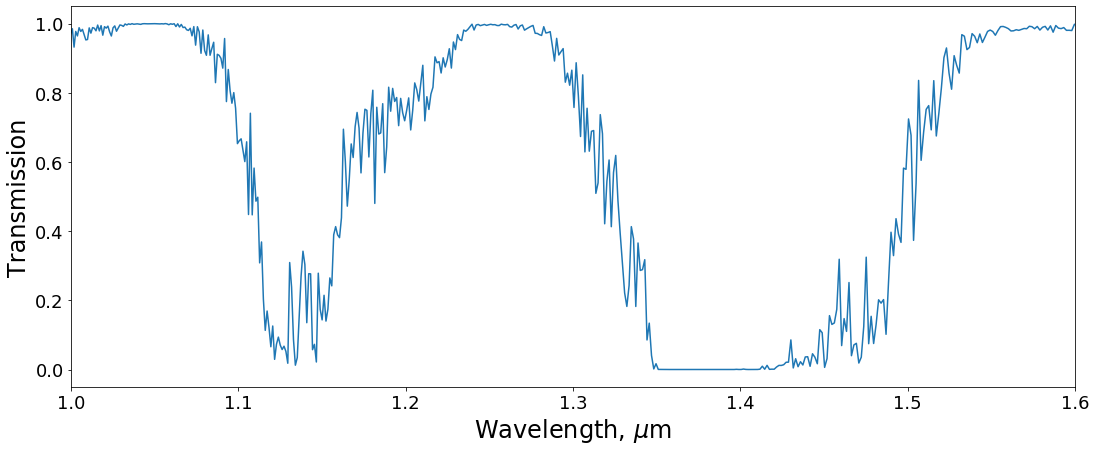

In [47]:
plt.figure(figsize=(18,7))
plt.plot(earth_water_example[:,0], earth_water_example[:,2])
#plt.plot(titan[:,0], titan[:,3])


plt.xlabel('Wavelength, $\mu$m', fontsize=24)
ax=plt.gca()
ax.tick_params(labelsize=18)
plt.ylabel('Transmission', fontsize=24)
#plt.legend(['Спектр пропускания воды', 'Спектр пропускания метана'], fontsize=22)
plt.xlim([1, 1.6])

In [48]:
earth_water_example = np.loadtxt('data/earth_high_water.txt', skiprows=2)

(1, 1.6)

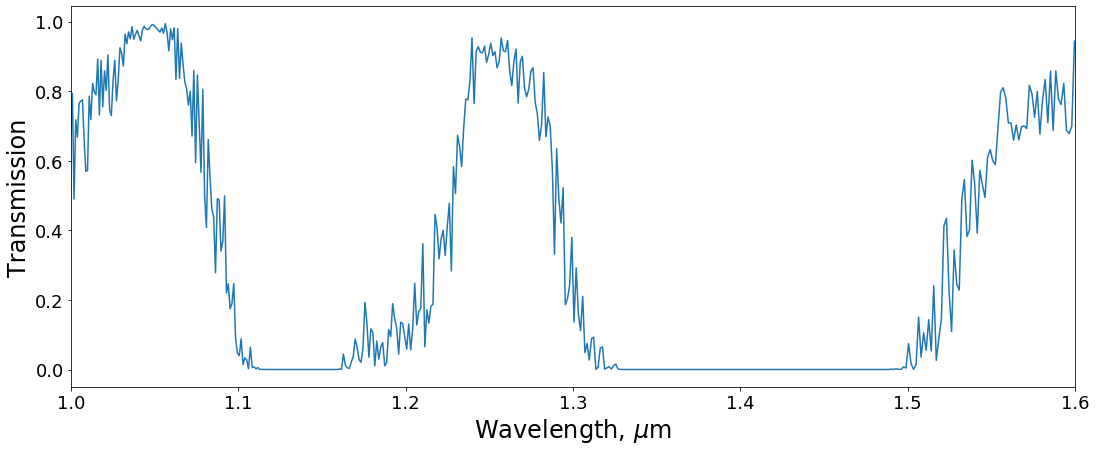

In [49]:
plt.figure(figsize=(18,7))
plt.plot(earth_water_example[:,0], earth_water_example[:,2])
#plt.plot(titan[:,0], titan[:,3])


plt.xlabel('Wavelength, $\mu$m', fontsize=24)
ax=plt.gca()
ax.tick_params(labelsize=18)
plt.ylabel('Transmission', fontsize=24)
#plt.legend(['Спектр пропускания воды', 'Спектр пропускания метана'], fontsize=22)
plt.xlim([1, 1.6])